# Исследование объявлений о продаже квартир в Санкт-Петербурге.

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


**Цели исследования**

* провести исследовательский анализ данных сервиса Яндекс Недвижимость;
* определить рыночную стоимость объектов недвижимости в Санкт-Петербурге и соседних населённых пунктах на основе полученных данных;
* установить параметры, влияющие на цену объектов недвижимости;
* дать рекомендации по автоматизации системы, которая будет отслеживать аномалии и подозрительную активность.

**Описание данных**

Данные содержатся в файле `real_estate_data.csv`

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

**План исследования**

Исследование пройдёт в несколько этапов:

1 — Обзор данных\
2 — Предобработка данных\
3 — Исследовательский анализ\
4 — Общий вывод

## Загрузка данных и изучение общей информации

In [1]:
#импорт библиотек Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#сохраняем файл в отдельную переменную
data = pd.read_csv('real_estate_data.csv', sep='\t')

#расширяем область вывода, чтобы были видны все столбцы, их в датафрейме много
pd.set_option('display.max_columns', None)
#устанавливаем настройку для отображения чисел во float формате
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings('ignore')#отключаем предупреждения об изменениях в библиотеках
sns.set_palette("crest")#задаем цвета для библиотеки seaborn

Выведем первые 5 строк датасета на экран и применим метод info()

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Строим гистограмму для всех числовых столбцов таблицы

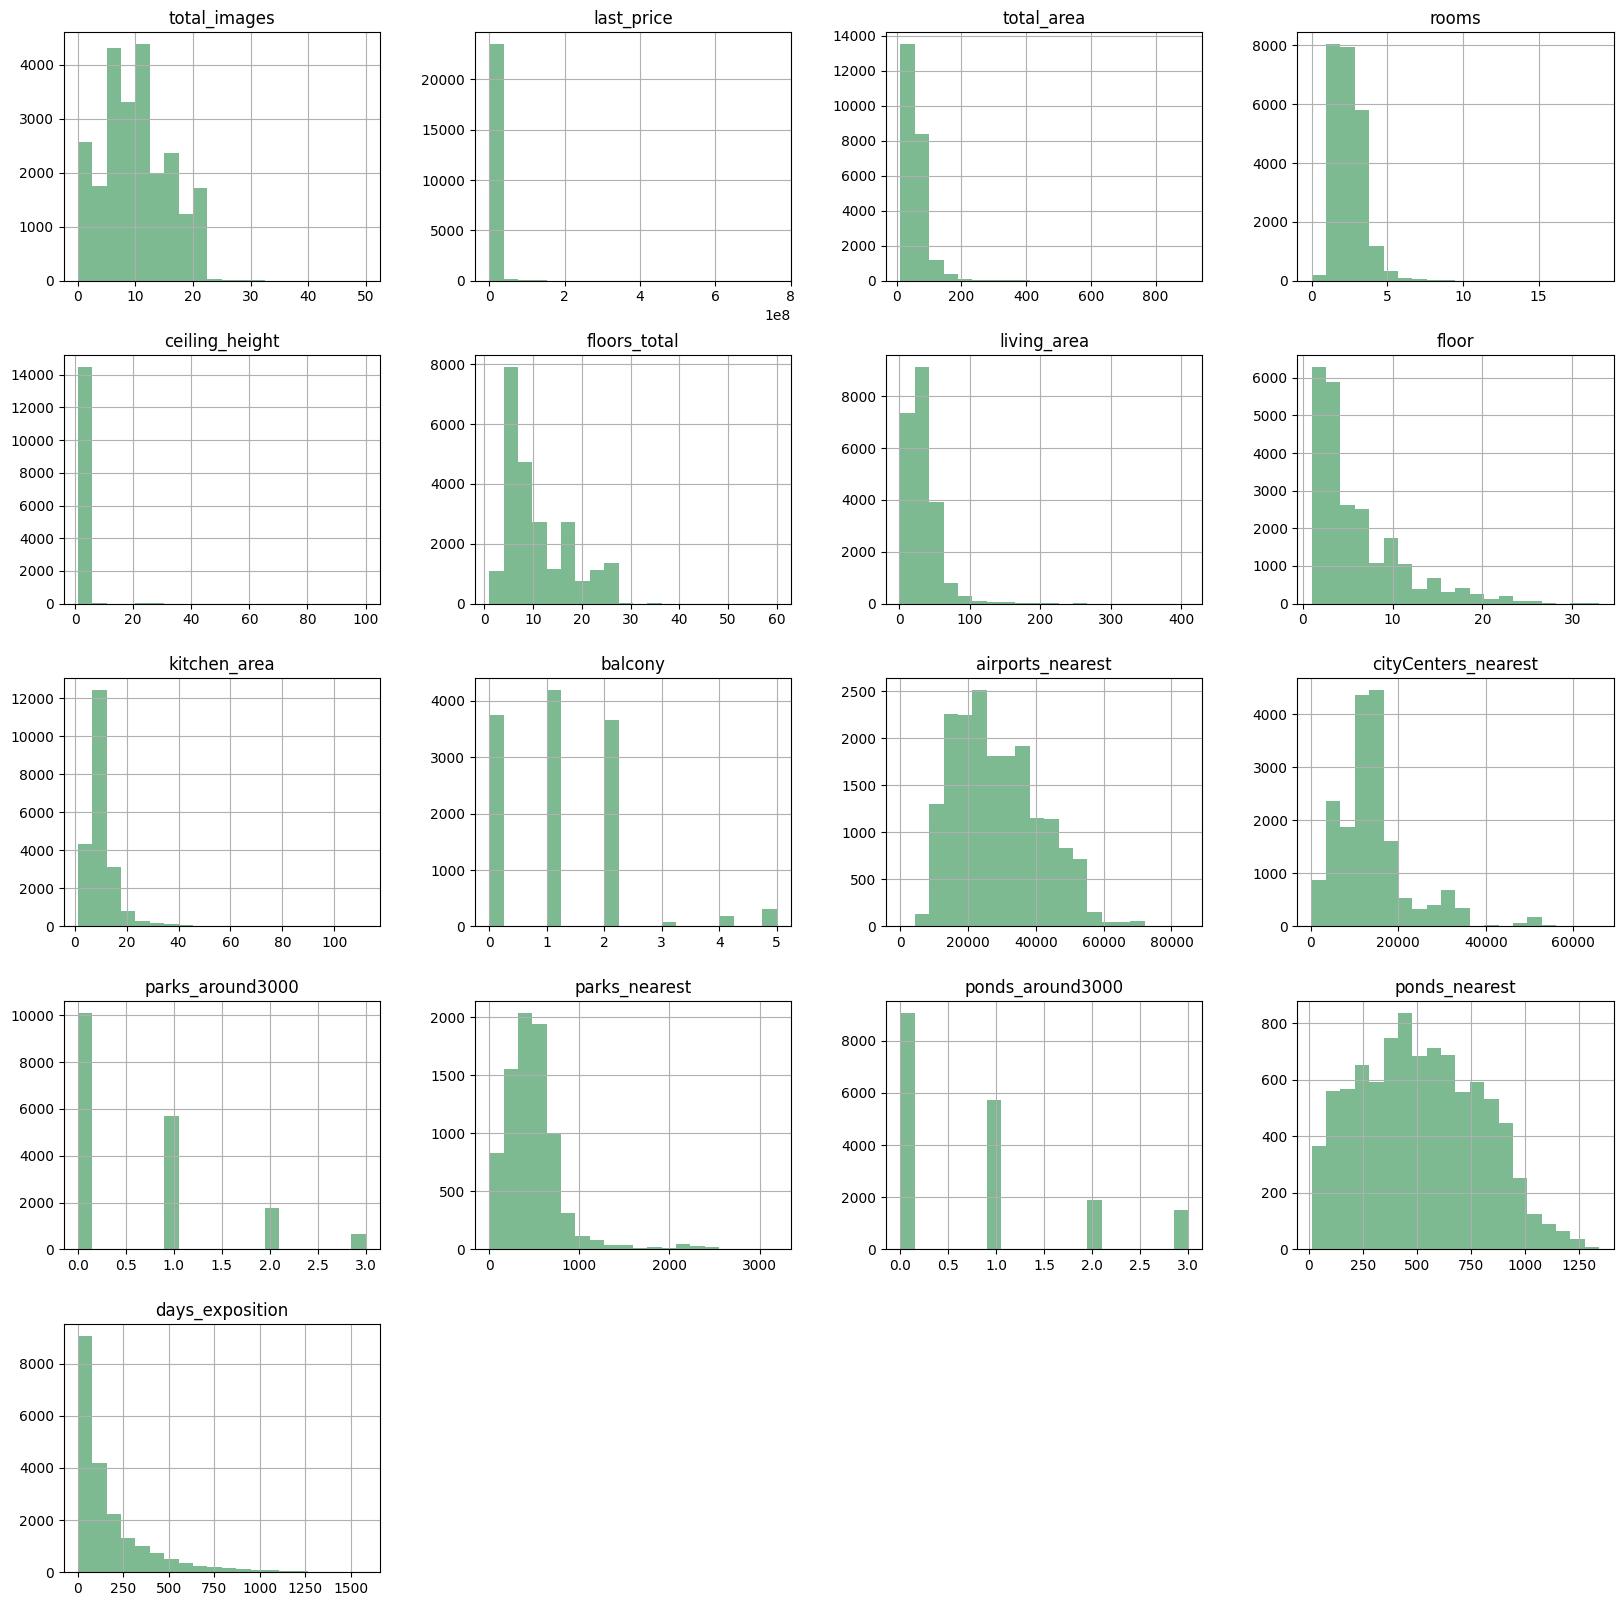

In [5]:
data.hist(bins=20, figsize=(20, 20));

### Промежуточный вывод

* Из общей информации о данных видно, что в 14 столбцах из 22 есть множественные пропуски.
* Также не у всех столбцов корректный тип данных. Только y столбца `locality_name`, содержащего названия локаций должен быть тип object. Если названия введены вручную, то там могут встретиться ошибки и опечатки, ведущие к неявным дубликатам.
* В названии `cityCenters_nearest` использована прописная буква.

**Необходимо заполнить пропуски, где это возможно, откорректировать типы данных в необходимых столбцах, отследить и удалить явные и неявные дубликаты, привести названия столбцов к змеиному регистру**

* По гистограммам видно, что во многих столбцах, например `last_price`, `ceiling_height` есть очень большие выбросы, поэтому график съехал влево. 
* В столбце `cityCenters_nearest` виден небольшой пик в районе значения 30 000. Интересно, уточнить его причину.

**Необходимо отследить такие аномальные значения и при наличии ошибок поправить значения или удалить, если корректное значение подобрать невозможно.**

Ниже проведем предобработку данных и изучим параметры поближе.

## Предобработка данных

### Приведение названий столбцов к единому регистру

In [6]:
#переименуем столбец 'cityCenters_nearest'
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

### Обработка пропусков

Выведем количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из описания данных мы знаем, что по каждой квартире на продажу доступны два вида данных:\
Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя. \
Можно также предположить, что количество дней размещения в столбце `days_exposition` рассчитывается автоматически.

Разделим столбцы, в которых есть пропуски на две такие категории, чтобы лучше понять причину пропусков.

|Данные вписаны пользователем | Данные получены автоматически | 
|-----------------------------|-------------------------------|
| ceiling_height              | days_exposition               | 
| floors_total                | airports_nearest              | 
| living_area                 | cityCenters_nearest           | 
| is_apartment                | parks_around3000              | 
| kitchen_area                | parks_nearest                 | 
| balcony                     | ponds_around3000              | 
| locality_name               | ponds_nearest                 |

#### Категория "Данные вписаны пользователем"

В столбцах ниже можно предположить, что продавец мог не знать или забыл вписать информацию о названии локации, высоте потолков, этажности здания, общей жилой площади и площади кухни. **Пока оставим такие пропуски на месте.**

* `ceiling_height`
* `floors_total`
* `living_area`
* `kitchen_area`
* `locality_name`

---

Столбец `balcony` содержит данные о числе балконов, но около половины значений (11 519 из 23 699) — пропуски. Возможно продавцы квартир без балконов просто не заполняют это поле, как ненужное?

Столбец `is_apartment` содержит булев тип данных и большинство значений пропущены (20 924 из 23 699). Тут также можно предположить, что продавцы просто не заполняли это поле, если им не нужно было пометить свою квартиру как апартаменты.

В этих двух столбцам заполним пропуски:
* **`balcony` — заменим пропуски на `0` (отсутствие балкона)**
* **`is_apartment` — заменим пропуски на `False` (не является апартаментами)**

---

In [8]:
#заполняем пропуски в столбцах 'balcony' и 'is_apartment'
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

#### Категория "Данные получены автоматически"


Теперь обратим внимание на автоматически полученные столбцы. Понять причину пропусков может помочь описание данных:

Столбцы ниже: расстояние до центра, аэропорта и других объектов — автоматически получены из геосервисов.
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах\
В этом случае пропуск может указывать на сильную удаленность от аэропортов. **Вывод — оставить пропуски**

* `city_сenters_nearest` — расстояние до центра города\
В этом случае пропуск может указывать на сильную удаленность от центра или отсутствие центра города как такового (у поселений в пригороде). **Вывод — оставить пропуски**

* `parks_around3000` — число парков в радиусе 3 км\
Пропуск может означать отсутствие парков в указанном радиусе. **Вывод — заменить пропуски на 0**

In [9]:
#заполняем пропуски в столбце 'parks_around3000' нулями
data['parks_around3000'] = data['parks_around3000'].fillna(0)

* `parks_nearest` — расстояние до ближайшего парка (м)\
Этот столбец напрямую зависит от столбца `parks_around3000`. Если парк вблизи отсутствует, то в столбце должен быть пропуск. Проверим совпадают ли значения.

Отсортируем таблицу по двум условиям — нулевое значение в `parks_around3000` и пропуск в `parks_nearest`.\
Выведем количество строк.

In [10]:
data.query('parks_nearest.isna() and parks_around3000 == 0').shape[0]

15620

Сравним с общим количеством 0 и пропусков в вышеуказанных столбцах

In [11]:
print('Количество нулевых значений в столбце \'parks_around3000\' —', data.query('parks_around3000 == 0')['parks_around3000'].count())
print('Количество пропусков значений в столбце \'parks_nearest\' —', data['parks_nearest'].isna().sum())

Количество нулевых значений в столбце 'parks_around3000' — 15624
Количество пропусков значений в столбце 'parks_nearest' — 15620


Разница в количестве равна 4-м строкам, проверим их.

In [12]:
#вывод всех уникальных значений столбца 'parks_nearest', при условии parks_around3000 равен 0
data.query('parks_around3000 == 0')['parks_nearest'].unique()

array([  nan, 3064., 3190., 3013.])

In [13]:
#подсчет этих уникальных значений
data.query('parks_around3000 == 0')['parks_nearest'].value_counts()

parks_nearest
3190.000    2
3064.000    1
3013.000    1
Name: count, dtype: int64

Получается эти четыре строки не содержат логической ошибки. Парки удалены более, чем на три километра, поэтому столбец 'parks_around3000' показывает `0`.
**Вывод — оставить пропуски как есть**

`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)

Тут ситуация схожа со столбцами с парками. Пропуск в `ponds_around3000` может указывать на отсутствие водоема, а пропуск в `ponds_nearest` зависит от значения 0 в столбце `ponds_around3000`.

**Заполним нулями пропуски в `ponds_around3000`** и сверим получившееся количество нулевых строк с пропусками во втором столбце.

In [14]:
#заполняем пропуски в столбце 'ponds_around3000'
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Отсортируем таблицу по двум условиям — нулевое значение в `ponds_around3000` и пропуск в `ponds_nearest`\
Выведем на экран количество строк.


In [15]:
data.query('ponds_nearest.isna() and ponds_around3000 == 0').shape[0]

14589

Сравним с общим количеством 0 и пропусков в вышеуказанных столбцах.

In [16]:
print('Количество нулевых значений в столбце \'ponds_around3000\' —', data.query('ponds_around3000 == 0')['ponds_around3000'].count())
print('Количество пропусков значений в столбце \'ponds_nearest\' —', data['ponds_nearest'].isna().sum())

Количество нулевых значений в столбце 'ponds_around3000' — 14589
Количество пропусков значений в столбце 'ponds_nearest' — 14589


Ура, все совпадает. Переходим к следующему столбцу. **Вывод — оставить пропуски как есть**

---

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

Возможно этот столбец заполняется системой автоматически после снятия объявления. У нас есть столбец `first_day_exposition`, указывающий дату публикации, но информации о дне снятия нет.

Возможно счетчик, который считает дни между двумя датами (снятия и публикации) сломался и не показывает определенные значения?

Посмотрим на распределение данных внутри столбца:

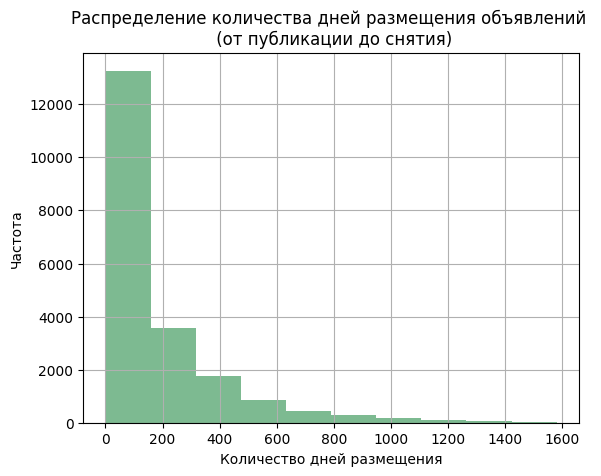

In [17]:
data['days_exposition'].hist(bins=10)

#прописываем оси и названия
plt.title('Распределение количества дней размещения объявлений \n (от публикации до снятия)')
plt.xlabel('Количество дней размещения') 
plt.ylabel('Частота');

Ограничим значения по оси X, чтобы приблизить околонулевые значения:

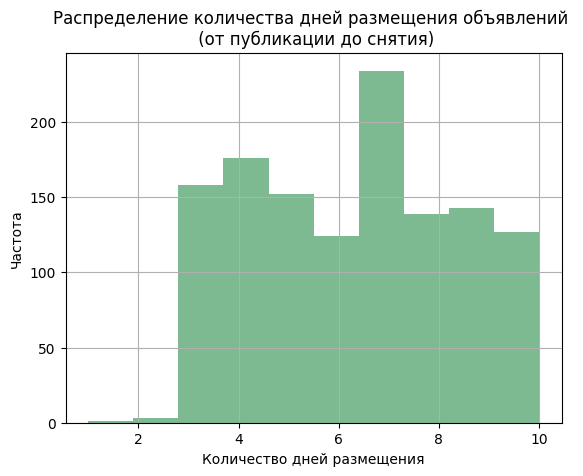

In [18]:
#гистограмма для столбца 'days_exposition' с ограничением значений до 10
data['days_exposition'].hist(bins=10, range=(1,10))

#прописываем оси и названия
plt.title('Распределение количества дней размещения объявлений \n (от публикации до снятия)')
plt.xlabel('Количество дней размещения') 
plt.ylabel('Частота');

Объявлений, которые размещались один или два дня подозрительно мало. Узнаем сколько их всего.

In [19]:
#срез данных по заданным условиям — публикация 1 или 2 дня
data[data['days_exposition'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1632,19,4000000.000,49.900,2019-05-01T00:00:00,2,2.500,9.000,25.000,1,False,False,False,10.000,0.000,Санкт-Петербург,13567.000,14384.000,1.000,20.000,1.000,681.000,1.000
13061,20,6100000.000,51.400,2019-04-29T00:00:00,2,3.000,5.000,31.700,4,False,False,False,6.900,1.000,Санкт-Петербург,10776.000,9389.000,0.000,NaN,0.000,NaN,2.000
16053,4,4070000.000,45.100,2019-04-30T00:00:00,2,NaN,5.000,22.700,3,False,False,False,6.600,0.000,Санкт-Петербург,40859.000,11668.000,2.000,485.000,0.000,NaN,2.000
16212,0,7806000.000,25.000,2019-04-30T00:00:00,1,3.000,5.000,NaN,5,False,False,False,NaN,0.000,Санкт-Петербург,36525.000,10302.000,0.000,NaN,0.000,NaN,2.000


Получается всего 4 строки. Есть шанс, что при вычитании дат случилась ошибка.
При этом мы не можем заполнить пропуски, так как не знаем, что корректнее поставить 1 день или 2.
В данном случае стоит уточнить у заказчика исследования, как собирались данные, чтобы понять природу пропусков.
**Вывод — оставить данные как есть**

Выведем итоговое количество пропущенных значений для каждого столбца.

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

###  Изменение типов данных

Еще раз выведем на экран информацию о типе данных в датафрейме.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* `first_day_exposition` — столбец содержит даты. Тип object поменяем на datetime64

* `floors_total`— столбец содержит информацию этажности здания. Хотелось бы привести его целочисленному типу int, но так как в этом столбце есть значения NaN (которые принадлежит к типу float64), то придется его оставить.

* `balcony` - количество балконов — целое число. Поменяем тип float64 на int64

* `parks_around3000` - количество парков — целое число. Поменяем тип float64 на int64

* `ponds_around3000` - количество водоемов — целое число. Поменяем тип float64 на int64

* `days_exposition` —  количество дней — целое число. Но так как в этом столбце есть значения NaN оставляем его как есть.

* Финально всем столбцам с типом `float64` поменяем тип `float32`

In [22]:
#замена типов данных нужным столбцам
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

#создаем список столбцов с типом float64
change_to_float23_list = ['last_price',
                          'total_area',
                          'ceiling_height',
                          'floors_total',
                          'living_area',
                          'kitchen_area',
                          'airports_nearest',
                          'city_centers_nearest',
                          'parks_nearest',
                          'days_exposition',
                          'ponds_nearest'
                         ]

#меняем тип с float64 на float32 для указанных в листе столбцов
for column in change_to_float23_list:
    data[column] = data[column].astype('float32')

Проверим все ли получилось:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

Все хорошо. Можно переходить к следующему этапу.

### Поиск и устранение дубликатов

#### Поиск явных дубликатов

In [24]:
#ищем полностью совпадающие строки и считаем их
data.duplicated().sum()

0

Полностью совпадающих строк нет.

#### Поиск неявных дубликатов

Дубликаты могут находиться в столбце `locality_name`, так как это единственный столбец с типом `object`, он содержит названия населенных пунктов, в которых могут быть ошибки и опечатки.

In [25]:
#создаем переменную со всеми уникальными значениями столбца 'locality_name',
#за исключением NaN и сортируем их по алфавиту
locality_names_unique = np.sort(data[~data['locality_name'].isna()]['locality_name'].unique())

print('\033[1m' + 'Уникальных значений в столбце \'locality_name\' до поиска дубликатов —', len(locality_names_unique))

Уникальных значений в столбце 'locality_name' до поиска дубликатов — 364


In [26]:
#выведем на экран в удобной форме
for name in locality_names_unique:
    print(name)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

**Наблюдения:**

В каких-то названиях типы поселения указаны, в каких-то — нет. Это создает лишние варианты названия локаций.
Например, `Вещево` и `поселок станции Вещево` — это одно и то же поселение. 
**Удалим типы поселения.**

Также в названиях часто встречаются варианты написания с буквой "ё". Например, `поселок` и `посёлок`.
**Заменим буквы `ё` на `е`**

In [27]:
#создадим лист с названиями типов поселений
cut_names_list = ['село ',
                  'садовое товарищество ',
                  'садоводческое некоммерческое товарищество ',
                  'городской поселок ',
                  'деревня ',
                  'коттеджный поселок ',
                  'поселок имени ',
                  'поселок городского типа ',
                  'поселок при железнодорожной станции ',
                  'поселок станции ',
                  'поселок ']

#заменяем `ё` на `е` и обрезаем типы поселений
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(cut_names_list, '', regex=True)

In [28]:
#обновим переменную
locality_names_unique = np.sort(data[~data['locality_name'].isna()]['locality_name'].unique())

#выведем на экран в удобной форме
for name in locality_names_unique:
    print(name)

Агалатово
Александровская
Алексеевка
Аннино
Аро
Барышево
Батово
Бегуницы
Белогорка
Белоостров
Бокситогорск
Большая Вруда
Большая Ижора
Большая Пустомержа
Большие Колпаны
Большое Рейзино
Большой Сабск
Бор
Борисова Грива
Бугры
Будогощь
Ваганово
Важины
Вартемяги
Вахнова Кара
Вещево
Виллози
Вознесенье
Возрождение
Войсковицы
Войскорово
Володарское
Волосово
Волхов
Всеволожск
Выборг
Вырица
Выскатка
Высокоключевой
Высоцк
Гаврилово
Гарболово
Гатчина
Гладкое
Глажево
Глебычево
Глинка
Гончарово
Горбунки
Гостилицы
Громово
Дзержинского
Дружная Горка
Дружноселье
Дубровка
Елизаветино
Ефимовский
Жилгородок
Жилпоселок
Житково
Заводской
Заклинье
Заневка
Запорожское
Зеленогорск
Зимитицы
Ивангород
Извара
Ильичево
Иссад
Калитино
Каложицы
Кальтино
Каменногорск
Камышовка
Каськово
Келози
Кивеннапа Север
Кикерино
Кингисепп
Кингисеппский
Кипень
Кириши
Кировск
Кирпичное
Кисельня
Кобралово
Кобринское
Колпино
Колтуши
Коммунар
Коммунары
Кондратьево
Копорье
Коркино
Корнево
Коробицыно
Котельский
Котлы
Красная Долина
К

**Сомнения может вызывать сходство написания следующих пар:**\
Коммунар и Коммунары\
Кингисеп и Кингисеппский\
Кузьмолово и Кузьмоловский\
Никольский и Никольское\
Павлово и Павловск\
Пикалево и Пикколово

Во всех случаях поиск в интернете подсказывает, что это два разных поселения в Ленинградской области.

Выведем итоговое количество уникальных названий.

In [29]:
print('\033[1m' + 'Уникальных значений в столбце \'locality_name\' после обработки неявных дубликатов —', len(locality_names_unique))

Уникальных значений в столбце 'locality_name' после обработки неявных дубликатов — 305


### Добавление новых столбцов

Создадим следующие столбцы:

* `square_meter_price` — цена одного квадратного метра
* `weekday` — день недели публикации объявления
* `month` — месяц публикации объявления
* `year` — год публикации объявления
* `floor_category` — тип этажа квартиры
* `city_centers_nearest_km` — расстояние до центра города в километрах

In [30]:
#создаем столбцы 'square_meter_price', 'weekday', 'month', 'year'
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

In [31]:
def floor_group(row):
    '''
    функция делит на три категории:
    'первый', 'последний', 'другой'
    в зависимости от этажа квартиры и этажности здания
    '''
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#создаем столбец 'floor_category', применяя функцию floor_group
data['floor_category'] = data.apply(floor_group, axis=1)

Выведем первые 5 строк дополненной таблицы:

In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category
0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,120370.367,3,3,2019,16.000,другой
1,7,3350000.000,40.400,2018-12-04,1,NaN,11.000,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,82920.789,1,12,2018,19.000,первый
2,10,5196000.000,56.000,2015-08-20,2,NaN,5.000,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,92785.711,3,8,2015,14.000,другой
3,0,64900000.000,159.000,2015-07-24,3,NaN,14.000,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.000,6800.000,2,84.000,3,234.000,424.000,408176.094,4,7,2015,7.000,другой
4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,100000.000,1,6,2018,8.000,другой


Новые столбцы на месте

### Промежуточный вывод
Мы подготовили данные к работе:

* Привели названия к единому написанию.
* Проверили данные на пропуски, заполнили пропуски, где это уместно подходящими значениями.
* Проверили данные на наличие явных и скрытых дубликатов, обработали скрытые дубликаты в столбце `locality_name`.
* Исправили типы данных.
* Добавили новые столбцы:
    * `square_meter_price` — цена одного квадратного метра;
    * `weekday` — день недели публикации объявления;
    * `month` — месяц публикации объявления;
    * `year` — год публикации объявления;
    * `floor_category` — тип этажа квартиры;
    * `city_centers_nearest_km` — расстояние до центра города в километрах.

## Исследовательский анализ данных

### Анализ основных параметров

#### Общая площадь

Применим к столбцу метод describe() и построим гистограмму

count   23699.000
mean       60.349
std        35.654
min        12.000
25%        40.000
50%        52.000
75%        69.900
max       900.000
Name: total_area, dtype: float64

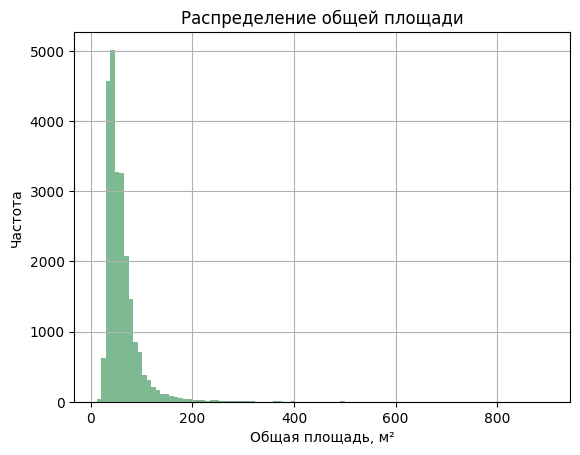

In [33]:
display(data['total_area'].describe())
data['total_area'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение общей площади')
plt.ylabel('Частота') 
plt.xlabel('Общая площадь, м²');

Максимальное значение столбца `total_area` (900 кв. м) сильно превышает большинство других значений, поэтому гистограмма сильно смещена влево.
Исключим слишком большие значения и посмотрим на остальные. 

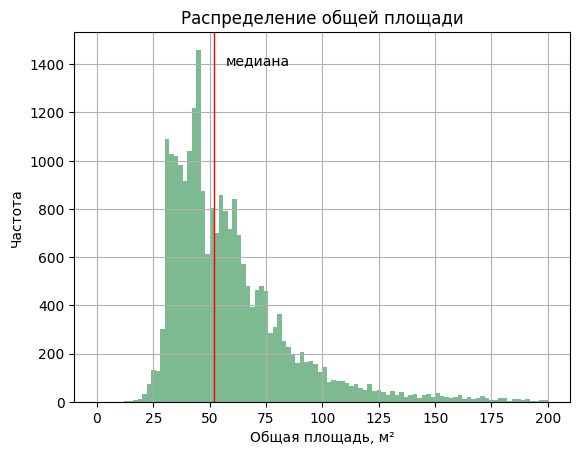

In [34]:
data['total_area'].hist(bins=100, range=(0,200))

plt.axvline(data['total_area'].median(), color='r', linestyle='-', linewidth=1)
plt.text(data['total_area'].median() + 5,1400,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение общей площади')
plt.ylabel('Частота') 
plt.xlabel('Общая площадь, м²');

Видно несколько пиков в районе 30, 45 и 60 м², возможно это связано с типовыми планировками квартир?

Обрежем значения вокруг пиков и посмотрим на гистограмму поближе.

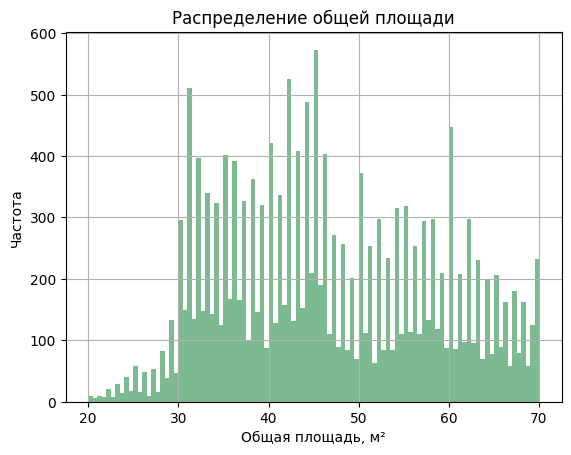

In [35]:
data['total_area'].hist(bins=100, range=(20,70))

#прописываем оси и названия
plt.title('Распределение общей площади')
plt.ylabel('Частота') 
plt.xlabel('Общая площадь, м²');

Похоже, что часть людей заполнявших форму, округляла значения, и мы видим отдельные небольшие пики на целых значениях.

Создадим отдельный столбец, где округлим значения площади до целых м². Посмотрим на самые часто встречающиеся значения.

In [36]:
#создаем столбец с округленными значениями
data['total_area_rounded'] = round(data['total_area'], 0)

#выводим на экран самые часто встречающиеся уникальные значения из нового столбца
data['total_area_rounded'].value_counts().head(10)

total_area_rounded
45.000    721
42.000    718
44.000    702
46.000    628
31.000    626
36.000    599
32.000    573
60.000    552
40.000    546
43.000    504
Name: count, dtype: int64

Выведем на экран 10 самых крупных объекта недвижимости.

In [37]:
data.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded
19540,8,420000000.000,900.000,2017-12-06,12,2.800,25.000,409.700,25,False,False,False,112.000,0,Санкт-Петербург,30706.000,7877.000,0,NaN,2,318.000,106.000,466666.625,2,12,2017,8.000,последний,900.000
12859,20,140000000.000,631.200,2019-04-09,7,3.900,4.000,322.300,4,False,False,False,19.500,1,Санкт-Петербург,25707.000,4972.000,0,NaN,2,210.000,NaN,221799.766,1,4,2019,5.000,последний,631.000
3117,19,140000000.000,631.000,2019-03-30,7,NaN,5.000,NaN,5,False,False,False,60.000,0,Санкт-Петербург,25707.000,4972.000,0,NaN,2,210.000,NaN,221870.047,5,3,2019,5.000,последний,631.000
15651,20,300000000.000,618.000,2017-12-18,7,3.400,7.000,258.000,5,False,False,False,70.000,0,Санкт-Петербург,32440.000,5297.000,0,NaN,2,198.000,111.000,485436.906,0,12,2017,5.000,другой,618.000
5358,20,65000000.000,590.000,2019-02-14,15,3.500,6.000,409.000,3,False,False,False,100.000,0,Санкт-Петербург,24447.000,4666.000,1,767.000,0,NaN,14.000,110169.492,3,2,2019,5.000,другой,590.000
4237,1,50000000.000,517.000,2017-10-14,7,NaN,4.000,332.000,3,False,False,False,22.000,0,Санкт-Петербург,22835.000,1847.000,2,477.000,2,540.000,NaN,96711.797,5,10,2017,2.000,другой,517.000
8018,20,84000000.000,507.000,2015-12-17,5,4.450,7.000,301.500,7,True,False,False,45.500,1,Санкт-Петербург,NaN,5735.000,2,110.000,0,NaN,1078.000,165680.469,3,12,2015,6.000,последний,507.000
5893,3,230000000.000,500.000,2017-05-31,6,NaN,7.000,NaN,7,False,False,False,40.000,0,Санкт-Петербург,32440.000,5297.000,0,NaN,2,198.000,50.000,460000.000,2,5,2017,5.000,последний,500.000
15016,8,150000000.000,500.000,2016-01-13,4,3.200,7.000,NaN,7,False,False,False,NaN,0,Санкт-Петербург,33058.000,6150.000,3,209.000,3,531.000,303.000,300000.000,2,1,2016,6.000,последний,500.000
12401,20,91500000.000,495.000,2017-06-19,7,4.650,7.000,347.500,7,False,False,False,25.000,0,Санкт-Петербург,NaN,5735.000,2,110.000,0,NaN,14.000,184848.484,0,6,2017,6.000,последний,495.000


Все объекты находятся в Санкт-Петербурге и зачастую на последнем этаже и имеют от 4 до 15 комнат.
Судя по всему в основном это пентхаусы в элитных жилых комплексах.

**Отсечем аномально большие значения 300 м² и более**

In [38]:
data = data.query('total_area <= 300 or total_area.isna()')

**Наблюдение:**
Наиболее распространенный метраж квартир 42 и 46 м².

####  Жилая площадь

Применим к столбцу метод describe() и построим гистограмму

count   21748.000
mean       34.035
std        19.860
min         2.000
25%        18.600
50%        30.000
75%        42.200
max       250.000
Name: living_area, dtype: float64

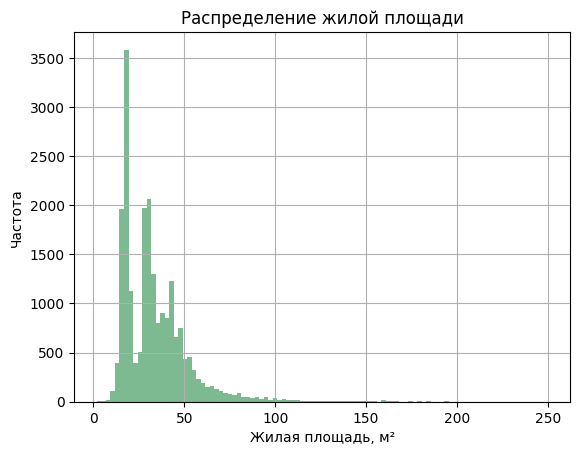

In [39]:
display(data['living_area'].describe())
data['living_area'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение жилой площади')
plt.ylabel('Частота') 
plt.xlabel('Жилая площадь, м²');

Исключим слишком большие значения и посмотрим на остальные:

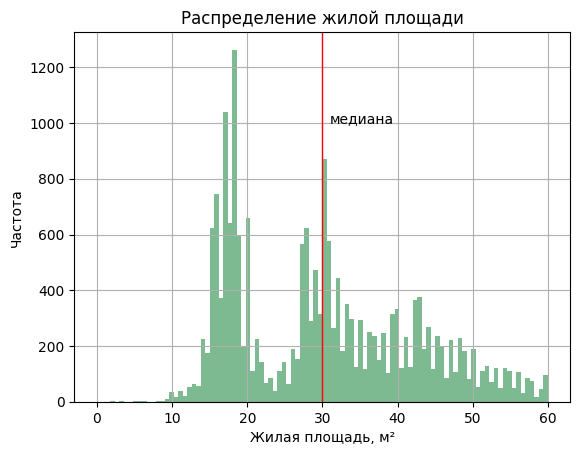

In [40]:
data['living_area'].hist(bins=100, range=(0,60))

plt.axvline(data['living_area'].median(), color='r', linestyle='-', linewidth=1)
plt.text(31,1000,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение жилой площади')
plt.ylabel('Частота') 
plt.xlabel('Жилая площадь, м²');

Видно три выраженных пика в районе 18, 30 (медиана) и 45 м², возможно это тоже связано с типовыми планировками?

Обрежем значения вокруг пиков и посмотрим на гистограмму поближе.

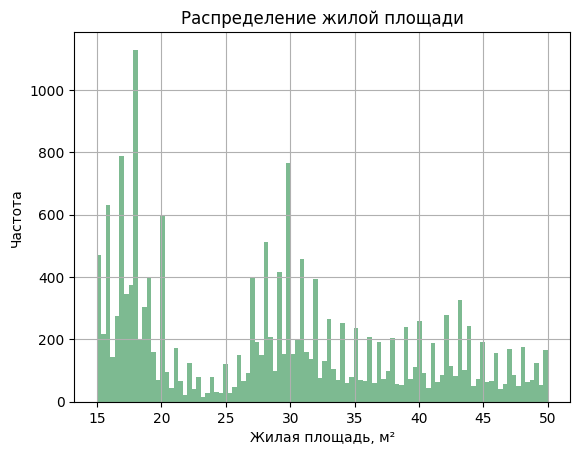

In [41]:
data['living_area'].hist(bins=100, range=(15,50))

#прописываем оси и названия
plt.title('Распределение жилой площади')
plt.ylabel('Частота') 
plt.xlabel('Жилая площадь, м²');

Опять можно наблюдать увеличение плотности у целых значений.\
Как и в случае с `total_area` создадим отдельный столбец, с округленными значениями.

In [42]:
#создаем столбец с округленными значениями
data['living_area_rounded'] = round(data['living_area'], 0)

#выводим на экран самые часто встречающиеся уникальные значения из нового столбца
data['living_area_rounded'].value_counts().head(15)

living_area_rounded
18.000    1805
17.000    1251
30.000    1147
16.000    1081
28.000     890
20.000     796
19.000     722
31.000     711
32.000     648
15.000     645
27.000     614
29.000     595
42.000     472
43.000     469
40.000     461
Name: count, dtype: int64

Выведем на экран 10 самых больших значений в столбце.

In [43]:
data.sort_values(by='living_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
15701,12,83000000.000,293.600,2017-11-10,4,NaN,9.000,250.000,7,False,False,False,35.000,0,Санкт-Петербург,25593.000,5913.000,2,164.000,0,NaN,NaN,282697.531,4,11,2017,6.000,другой,294.000,250.000
16915,14,29000000.000,292.200,2017-01-12,9,3.350,5.000,225.900,4,False,False,False,32.900,1,Санкт-Петербург,24892.000,5162.000,2,263.000,0,NaN,825.000,99247.094,3,1,2017,5.000,другой,292.000,226.000
7857,11,150000000.000,230.000,2017-10-25,8,NaN,8.000,220.000,8,False,False,False,NaN,0,Санкт-Петербург,25525.000,5845.000,2,116.000,0,NaN,135.000,652173.938,2,10,2017,6.000,последний,230.000,220.000
21685,7,22160000.000,277.600,2017-08-19,7,3.800,6.000,211.000,3,False,False,False,17.800,0,Санкт-Петербург,25761.000,5671.000,2,375.000,1,479.000,22.000,79827.078,5,8,2017,6.000,другой,278.000,211.000
10246,10,25023000.000,253.700,2017-11-10,6,NaN,4.000,200.000,2,False,False,False,33.000,0,Санкт-Петербург,20687.000,1214.000,3,103.000,3,155.000,90.000,98632.242,4,11,2017,1.000,другой,254.000,200.000
22907,9,65000000.000,228.000,2016-06-02,4,NaN,5.000,200.000,2,False,False,False,NaN,0,Санкт-Петербург,22783.000,1295.000,3,619.000,3,269.000,NaN,285087.719,3,6,2016,1.000,другой,228.000,200.000
6728,10,55000000.000,280.000,2018-03-22,7,4.400,6.000,195.000,5,False,False,False,22.000,1,Санкт-Петербург,32534.000,4725.000,0,NaN,2,594.000,406.000,196428.578,3,3,2018,5.000,другой,280.000,195.000
4199,8,24900000.000,281.100,2018-02-21,6,3.300,5.000,193.500,3,False,False,False,26.600,0,Санкт-Петербург,21480.000,2453.000,3,75.000,1,795.000,126.000,88580.578,2,2,2018,2.000,другой,281.000,194.000
7694,4,30000000.000,251.000,2017-07-27,7,3.500,5.000,193.000,4,False,False,False,21.000,0,Санкт-Петербург,22068.000,3334.000,0,NaN,1,802.000,613.000,119521.906,3,7,2017,3.000,другой,251.000,193.000
18891,11,40000000.000,290.000,2016-06-21,10,3.500,6.000,189.400,6,False,False,False,30.000,1,Санкт-Петербург,26229.000,4932.000,3,316.000,1,227.000,77.000,137931.031,1,6,2016,5.000,последний,290.000,189.000


Как и в столбце `total_area` все объекты — многокомнатные помещения в Санкт-Петербурге.\
Отсечем аномально большие значения 150 м² и больше.

In [44]:
data = data.query('living_area <= 150 or living_area.isna()')

**Наблюдение:** Hаиболее распространенный метраж жилой площади 18,17 и 30 м².

#### Площадь кухни

Применим к столбцу метод describe() и построим гистограмму

count   21302.000
mean       10.457
std         5.571
min         1.300
25%         7.000
50%         9.100
75%        12.000
max       107.000
Name: kitchen_area, dtype: float64

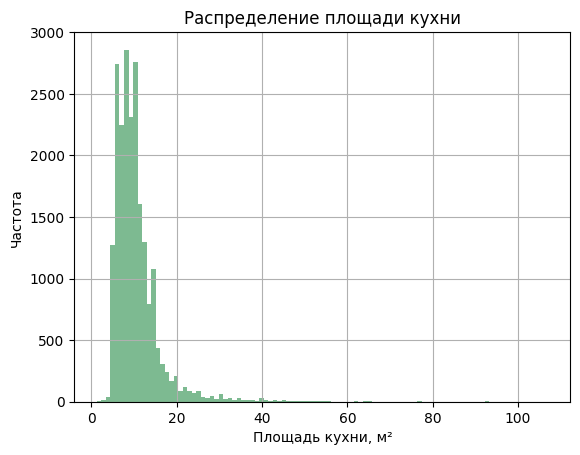

In [45]:
display(data['kitchen_area'].describe())

data['kitchen_area'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение площади кухни')
plt.ylabel('Частота') 
plt.xlabel('Площадь кухни, м²');

Как обычно отсечем излишне высокие значения.

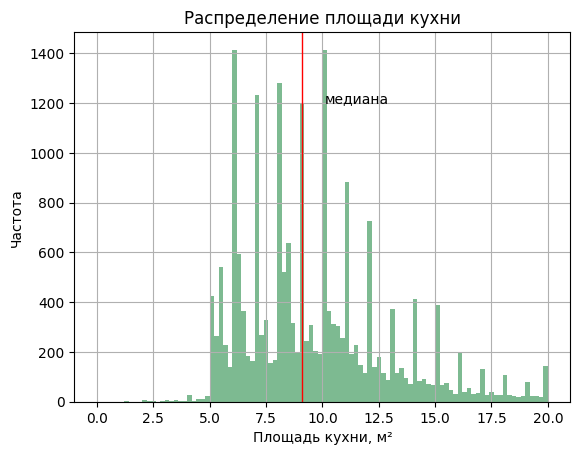

In [46]:
data['kitchen_area'].hist(bins=100, range=(0,20))

plt.axvline(data['kitchen_area'].median(), color='r', linestyle='-', linewidth=1)
plt.text(data['kitchen_area'].median()+1,1200,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение площади кухни')
plt.ylabel('Частота') 
plt.xlabel('Площадь кухни, м²');

In [47]:
#выводим на экран самые часто встречающиеся уникальные значения из нового столбца
data['kitchen_area'].value_counts().head(10)

kitchen_area
6.000     1300
10.000    1261
8.000     1110
9.000     1101
7.000     1062
11.000     797
12.000     661
8.500      415
5.500      400
14.000     381
Name: count, dtype: int64

Выведем на экран 10 самых больших значений в столбце.

In [48]:
data.sort_values(by='kitchen_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
20215,2,85000000.000,249.700,2018-02-01,3,NaN,10.000,72.000,9,False,False,False,107.000,4,Санкт-Петербург,31532.000,4624.000,1,2218.000,2,99.000,26.000,340408.469,3,2,2018,5.000,другой,250.000,72.000
16239,5,82400000.000,181.100,2017-05-24,3,3.900,9.000,58.200,4,False,False,False,93.200,0,Санкт-Петербург,25525.000,5845.000,2,116.000,0,NaN,501.000,454997.188,2,5,2017,6.000,другой,181.000,58.000
16797,9,65850000.000,146.000,2017-07-14,2,NaN,9.000,40.000,3,False,False,False,93.000,0,Санкт-Петербург,25525.000,5845.000,2,116.000,0,NaN,77.000,451027.406,4,7,2017,6.000,другой,146.000,40.000
10867,1,56844500.000,177.900,2015-01-15,3,NaN,6.000,87.200,5,True,False,False,87.200,0,Санкт-Петербург,21860.000,318.000,2,160.000,3,569.000,NaN,319530.656,3,1,2015,0.000,другой,178.000,87.000
492,18,95000000.000,216.000,2017-12-05,4,3.000,5.000,86.000,4,False,False,False,77.000,0,Санкт-Петербург,21740.000,436.000,2,138.000,3,620.000,14.000,439814.812,1,12,2017,0.000,другой,216.000,86.000
4394,20,57000000.000,174.000,2015-11-09,3,3.200,10.000,95.000,6,False,False,False,77.000,0,Санкт-Петербург,31706.000,4166.000,1,193.000,3,199.000,1039.000,327586.219,0,11,2015,4.000,другой,174.000,95.000
14644,17,47000000.000,150.000,2017-02-28,4,3.700,6.000,58.000,5,False,False,False,75.000,1,Санкт-Петербург,16085.000,7616.000,0,NaN,0,NaN,507.000,313333.344,1,2,2017,8.000,другой,150.000,58.000
16647,15,122000000.000,145.000,2017-04-25,3,3.300,6.000,36.000,2,False,False,False,72.000,0,Санкт-Петербург,33931.000,7023.000,2,478.000,3,250.000,335.000,841379.250,1,4,2017,7.000,другой,145.000,36.000
6193,19,24300000.000,230.000,2016-06-03,4,NaN,3.000,90.000,2,False,False,False,70.000,0,Санкт-Петербург,39422.000,15354.000,0,NaN,1,345.000,397.000,105652.172,4,6,2016,15.000,другой,230.000,90.000
18447,17,21800000.000,187.000,2018-01-14,5,NaN,4.000,120.000,4,False,False,False,65.000,0,Санкт-Петербург,43758.000,15461.000,1,756.000,2,278.000,NaN,116577.539,6,1,2018,15.000,последний,187.000,120.000


Ничего необычного.

Отсечем аномально большие значения 40 м² и больше.

In [49]:
data = data.query('kitchen_area <= 40 or kitchen_area.isna()')

**Наблюдение:** Наиболее распространенный метраж кухонь 6,10 и 8 м².

#### Цена объекта
Применим к столбцу метод describe() и построим гистограмму

count       23453.000
mean      6064854.000
std       6693556.000
min        430000.000
25%       3400000.000
50%       4600000.000
75%       6699000.000
max     330000000.000
Name: last_price, dtype: float64

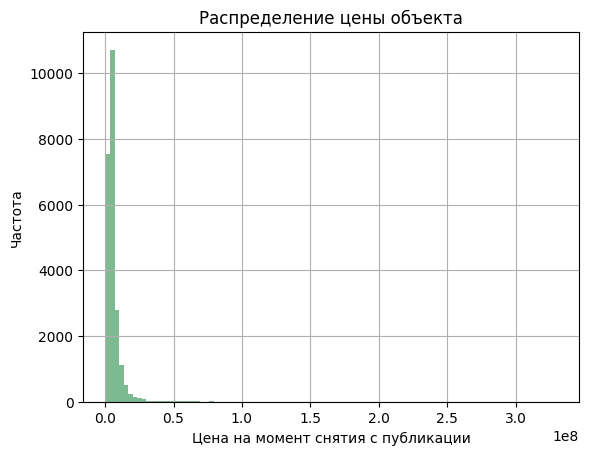

In [50]:
display(data['last_price'].describe())
data['last_price'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение цены объекта')
plt.ylabel('Частота') 
plt.xlabel('Цена на момент снятия с публикации');

Поделим значения этого столбца на 1 млн., чтобы привести их в более удобный вид.

In [51]:
data['last_price'] = data['last_price']/1000000

Как обычно отсечем аномально высокие значения

In [52]:
display(data['last_price'].describe())

count   23453.000
mean        6.065
std         6.694
min         0.430
25%         3.400
50%         4.600
75%         6.699
max       330.000
Name: last_price, dtype: float64

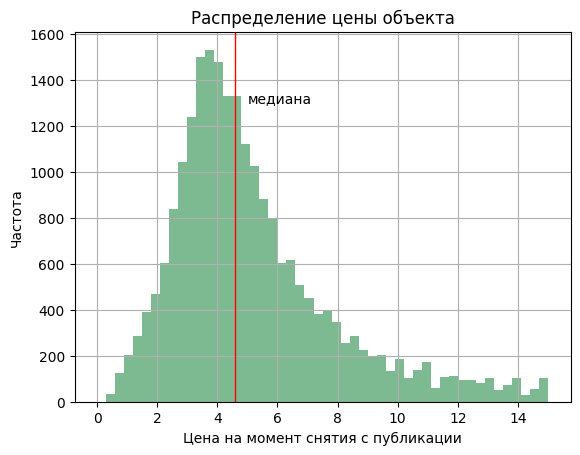

In [53]:
data['last_price'].hist(bins=50,range=(0,15))

plt.axvline(data['last_price'].median(), color='r', linestyle='-', linewidth=1)
plt.text(5,1300,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение цены объекта')
plt.ylabel('Частота') 
plt.xlabel('Цена на момент снятия с публикации');

Распределение выглядит нормально, с одним пиком чуть левее медианы, около 3,5 млн.\
Посмотрим на самые высокие и низкие значения и поищем аномалии.

In [54]:
#самые высокие значения
data.sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
1436,19,330.000,190.000,2018-04-04,3,3.500,7.000,95.000,5,False,False,False,40.000,0,Санкт-Петербург,23011.000,1197.000,3,519.000,3,285.000,233.000,1736842.125,2,4,2018,1.000,другой,190.000,95.000
22831,18,289.238,187.500,2019-03-19,2,3.370,6.000,63.700,6,False,False,False,30.200,0,Санкт-Петербург,22494.000,1073.000,3,386.000,3,188.000,NaN,1542604.750,1,3,2019,1.000,последний,188.000,64.000
8900,13,190.870,268.000,2016-03-25,3,NaN,8.000,132.000,7,False,False,False,40.000,0,Санкт-Петербург,32440.000,5297.000,0,NaN,2,198.000,901.000,712201.500,4,3,2016,5.000,другой,268.000,132.000
19155,20,160.000,243.000,2018-11-12,5,NaN,5.000,145.000,4,False,False,False,33.000,0,Санкт-Петербург,22640.000,555.000,3,285.000,1,200.000,18.000,658436.188,0,11,2018,1.000,другой,243.000,145.000
2536,16,159.984,242.400,2015-08-27,4,3.850,9.000,131.000,7,False,False,False,20.000,0,Санкт-Петербург,21946.000,2242.000,1,679.000,1,227.000,501.000,660000.000,3,8,2015,2.000,другой,242.000,131.000
12674,16,140.000,241.000,2015-07-24,5,3.000,5.000,NaN,4,False,False,False,NaN,0,Санкт-Петербург,23512.000,3503.000,3,413.000,3,83.000,399.000,580912.875,4,7,2015,4.000,другой,241.000,NaN
13864,20,130.000,231.000,2015-08-13,6,3.600,6.000,148.000,4,False,False,False,12.000,0,Санкт-Петербург,22992.000,1280.000,3,395.000,3,170.000,467.000,562770.562,3,8,2015,1.000,другой,231.000,148.000
20349,17,124.480,267.700,2016-06-18,4,NaN,8.000,107.030,8,False,False,False,29.860,0,Санкт-Петербург,27102.000,7442.000,2,164.000,2,473.000,205.000,464998.125,5,6,2016,7.000,последний,268.000,107.000
21023,17,124.350,248.700,2015-08-27,4,3.400,9.000,131.000,4,False,False,False,23.000,0,Санкт-Петербург,21946.000,2242.000,1,679.000,1,227.000,501.000,500000.000,3,8,2015,2.000,другой,249.000,131.000
4996,20,124.000,124.500,2017-10-12,4,3.000,4.000,67.200,2,False,False,False,20.000,0,Санкт-Петербург,20399.000,1722.000,3,302.000,3,172.000,45.000,995983.938,3,10,2017,2.000,другой,124.000,67.000


В целом все логично, опять какое-то элитное жилье в Санкт-Петербурге.

In [55]:
#самые низкие значения
data.sort_values(by='last_price', ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
17456,7,0.430,30.400,2019-04-22,1,NaN,2.000,16.000,1,False,False,False,6.000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN,14144.740,0,4,2019,NaN,первый,30.000,16.000
14911,5,0.430,54.000,2018-06-26,2,NaN,3.000,NaN,3,False,False,False,NaN,0,Свирь,NaN,NaN,0,NaN,0,NaN,44.000,7962.960,1,6,2018,NaN,последний,54.000,NaN
16274,18,0.440,40.000,2018-07-10,1,NaN,5.000,NaN,1,False,False,False,NaN,0,Старополье,NaN,NaN,0,NaN,0,NaN,45.000,11000.000,1,7,2018,NaN,первый,40.000,NaN
17676,0,0.450,36.500,2018-02-01,1,NaN,5.000,17.300,4,False,False,False,8.500,1,Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.000,12328.770,3,2,2018,NaN,другой,36.000,17.000
16219,14,0.450,38.500,2018-07-11,2,2.650,2.000,NaN,1,False,False,False,NaN,0,Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.000,11688.310,2,7,2018,NaN,первый,38.000,NaN
5698,7,0.450,42.000,2017-07-31,2,NaN,1.000,23.000,1,False,False,False,5.800,0,Будогощь,NaN,NaN,0,NaN,0,NaN,233.000,10714.290,0,7,2017,NaN,первый,42.000,23.000
9581,7,0.450,43.400,2018-08-31,2,NaN,5.000,30.300,3,False,False,False,5.500,0,Старополье,NaN,NaN,0,NaN,0,NaN,96.000,10368.660,4,8,2018,NaN,другой,43.000,30.000
21912,0,0.470,37.000,2018-02-18,1,NaN,3.000,NaN,3,False,False,False,NaN,0,Совхозный,NaN,NaN,0,NaN,0,NaN,45.000,12702.700,6,2,2018,NaN,последний,37.000,NaN
23484,11,0.470,44.500,2018-07-02,2,NaN,2.000,28.000,2,False,False,False,7.500,0,Сланцы,NaN,NaN,0,NaN,0,NaN,298.000,10561.800,0,7,2018,NaN,последний,44.000,28.000
18867,1,0.470,41.000,2018-02-11,1,NaN,5.000,32.000,3,False,False,False,9.000,0,Выскатка,NaN,NaN,0,NaN,0,NaN,46.000,11463.420,6,2,2018,NaN,другой,41.000,32.000


Удалим аномально высокие значения 25 млн и выше.

In [56]:
data = data.query('last_price <= 25 or last_price.isna()')

**Наблюдение:** Самая распространенная стоимость — около 3.5 млн.

#### Количество комнат
Применим к столбцу метод describe() и построим гистограмму

count   23131.000
mean        2.019
std         0.990
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        11.000
Name: rooms, dtype: float64

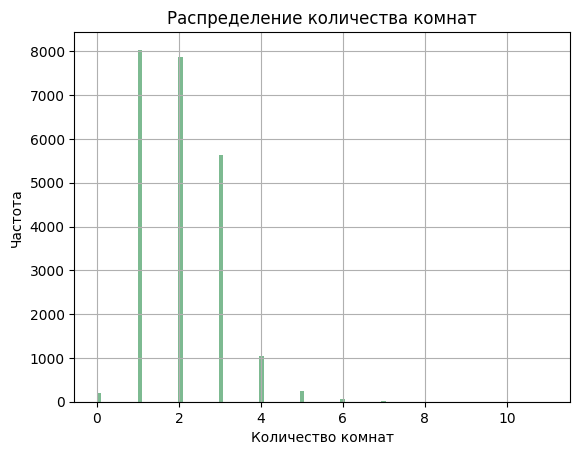

In [57]:
display(data['rooms'].describe())
data['rooms'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение количества комнат')
plt.ylabel('Частота') 
plt.xlabel('Количество комнат');

Так как в этом столбце только целые значения от 0 до 19, то нагляднее будет использовать метод подсчета уникальных значений

In [58]:
data['rooms'].value_counts()

rooms
1     8037
2     7880
3     5635
4     1055
5      237
0      196
6       61
7       24
8        3
11       1
10       1
9        1
Name: count, dtype: int64

Можно увидеть обратная зависимость между количеством объявлений и количеством комнат.

Также в 196 объявлениях в количестве комнат указан 0. Есть гипотеза, что это владельцы студий и квартир со свободной планировкой. Изучим связь этих столбцов.

In [59]:
#количество строк со значением 0 в столбце 'rooms', в которых не стоит отметка 'студия' или 'свободная планировка'
len(data.query('rooms == 0 and studio != True and open_plan != True'))

0

Таких строк нет. Значит гипотеза верна.

Так как оба варианта помещений все же имеют комнату, хоть и без перегородок (кухня и жилая комната объединены в единое пространство) поменяем `0` на `1`

In [60]:
#замена 0 на 1
data['rooms'] = data['rooms'].replace(0, 1)

#опять посчитаем распределение уникальных значений в столбце
data['rooms'].value_counts()

rooms
1     8233
2     7880
3     5635
4     1055
5      237
6       61
7       24
8        3
11       1
10       1
9        1
Name: count, dtype: int64

**Наблюдение:** Помещения с одной комнатой наиболее распространены.

#### Высота потолков
Применим к столбцу метод describe() и построим гистограмму

count   14124.000
mean        2.759
std         1.273
min         1.000
25%         2.500
50%         2.650
75%         2.800
max       100.000
Name: ceiling_height, dtype: float64

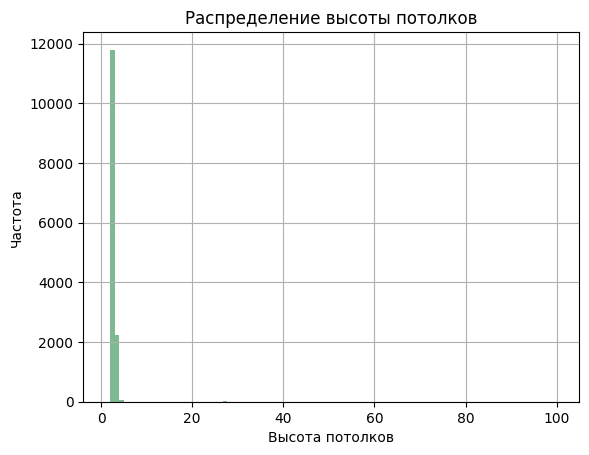

In [61]:
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение высоты потолков')
plt.ylabel('Частота') 
plt.xlabel('Высота потолков');

Обрежем аномально большие значения

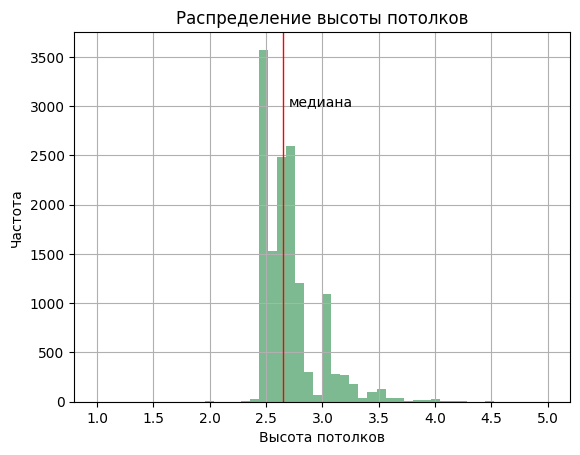

In [62]:
data['ceiling_height'].hist(bins=50,range=(1,5))


plt.axvline(data['ceiling_height'].median(), color='r', linestyle='-', linewidth=1)
plt.text(2.7,3000,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение высоты потолков')
plt.ylabel('Частота') 
plt.xlabel('Высота потолков');

Отчетливо видны пики около значений 2.5, 2.7, 3\
В описании данных указано максимально значение в столбце — 100 метров. Должно быть это ошибка.

Сделаем срез данных с потолками метров и более и изучим его.

In [63]:
#создаем срез данных по нужным условиям и выводим уникальные значения и их количество на экран
data.query('ceiling_height >= 5')['ceiling_height'].value_counts()

ceiling_height
27.000     8
25.000     7
8.000      3
32.000     2
5.000      1
24.000     1
26.000     1
8.300      1
5.300      1
14.000     1
20.000     1
22.600     1
5.800      1
27.500     1
10.300     1
100.000    1
Name: count, dtype: int64

Если 5-и метровые потолки могут существовать в квартирах с 2-х этажной планировкой, то 100 и 27 — это уже аномалия. Логично предположить, что заполняющий анкету ошибся и вписал значение на порядок больше.

Разделим все значения более 10 метров на 10.

In [64]:
def ceiling_fix(row):
    '''
    функция ищет значения в столбце ceiling_height
    и делит из на 10, если они превышают 10
    '''
    if row['ceiling_height'] >= 10:
        return row['ceiling_height']/10
    else:
        return row['ceiling_height']


#применим функцию ceiling_fix к датасету
data['ceiling_height'] = data.apply(ceiling_fix, axis=1)

In [65]:
#посчитаем количество объявления с потолками 5 и более метров
len(data.query('ceiling_height >= 5'))

8

Строк всего 8, удалим их как выбивающиеся.

In [66]:
#удаляем строки с аномальным значением
data = data.query('ceiling_height < 5 or ceiling_height.isna()')

Теперь обратим внимание на аномально маленькие значения

In [67]:
#создаем срез данных по нужным условиям и выводим уникальные значения и их количество на экран
data.query('ceiling_height <= 2')['ceiling_height'].value_counts()

ceiling_height
2.000    12
1.200     1
1.400     1
1.750     1
1.030     1
1.000     1
Name: count, dtype: int64

Удалим все строки, с высотой менее 2-х метров.

In [68]:
#удаляем строки с аномальным значением
data = data.query('ceiling_height >= 2 or ceiling_height.isna()')

In [69]:
#еще раз отсортируем и посмотрим на уникальные значения 
data['ceiling_height'].value_counts().head(10)

ceiling_height
2.500    3518
2.600    1644
2.700    1566
3.000    1018
2.550     979
2.800     977
2.750     899
2.650     676
3.200     246
3.100     178
Name: count, dtype: int64

**Наблюдение:** Наиболее распространены потолки высотой в 2.5 метров.

#### Тип этажа квартиры
Применим к столбцу метод describe() и построим гистограмму

count      23118
unique         3
top       другой
freq       17025
Name: floor_category, dtype: object

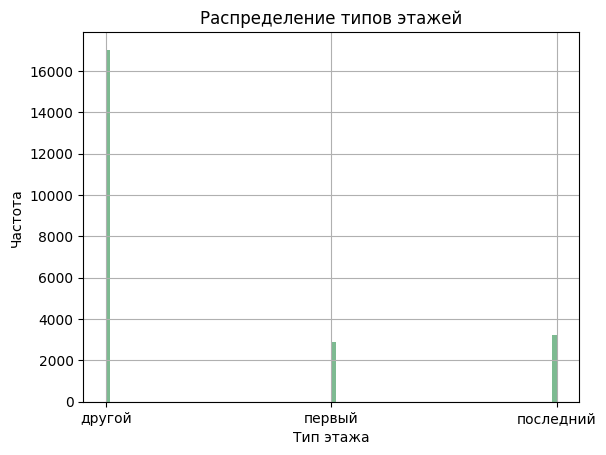

In [70]:
display(data['floor_category'].describe())
data['floor_category'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение типов этажей')
plt.ylabel('Частота') 
plt.xlabel('Тип этажа');

Так как в этом столбце только три уникальных значения, то нагляднее будет использовать метод value_counts()

In [71]:
data['floor_category'].value_counts()

floor_category
другой       17025
последний     3207
первый        2886
Name: count, dtype: int64

**Наблюдение:** Квартиры на 1-м этаже продают чуть реже, чем на последнем, а категория`другой` — самая крупная, что неудивительно, ведь в нее входят все этажи, кроме 1-го и последнего

#### Общее количество этажей в доме
Применим к столбцу метод describe() и построим гистограмму

count   23033.000
mean       10.735
std         6.625
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

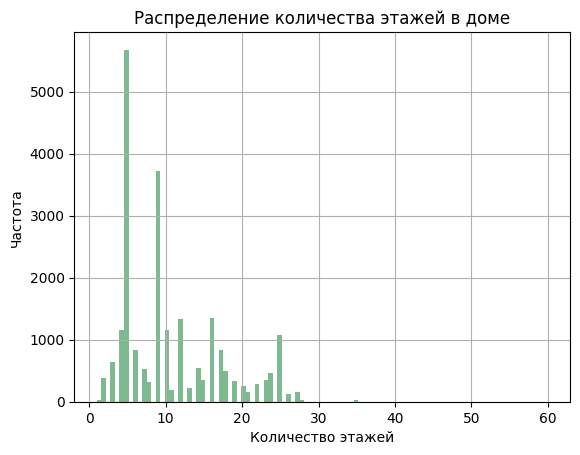

In [72]:
display(data['floors_total'].describe())
data['floors_total'].hist(bins=100)

#прописываем оси и названия
plt.title('Распределение количества этажей в доме')
plt.ylabel('Частота') 
plt.xlabel('Количество этажей');

Обрежем аномально большие значения

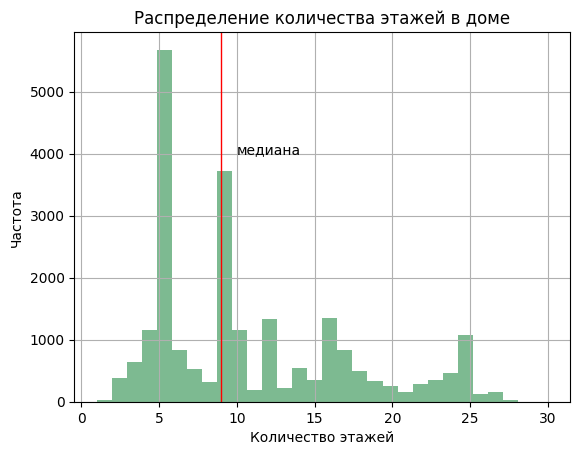

In [73]:
data['floors_total'].hist(bins=30,range=(1,30))

plt.axvline(data['floors_total'].median(), color='r', linestyle='-', linewidth=1)
plt.text(10,4000,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение количества этажей в доме')
plt.ylabel('Частота') 
plt.xlabel('Количество этажей');

Самые выраженные пики — 5 и 9 этажей.

Посмотрим самые часто встречающиеся здания:

In [74]:
data['floors_total'].value_counts().head()

floors_total
5.000     5676
9.000     3725
16.000    1358
12.000    1340
4.000     1153
Name: count, dtype: int64

Теперь отсортируем аномальные значения в 30 этажей и более.

In [75]:
#узнаем количество таких значений
len(data.query('floors_total >= 30'))

31

In [76]:
#выведем срез данных на экран
data.query('floors_total >= 30').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
397,15,5.990,54.000,2018-03-22,2,NaN,36.000,21.400,28,False,False,False,18.700,1,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,11.000,110925.930,3,3,2018,20.000,другой,54.000,21.000
871,14,7.778,75.000,2017-11-16,2,NaN,35.000,40.500,23,False,False,False,11.700,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,169.000,103703.703,3,11,2017,20.000,другой,75.000,40.000
1060,10,5.200,50.000,2015-11-06,2,NaN,35.000,39.000,15,False,False,False,20.500,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,281.000,104000.000,4,11,2015,20.000,другой,50.000,39.000
1697,11,3.550,28.000,2018-02-08,1,2.650,34.000,18.000,23,False,False,False,NaN,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,410.000,126785.711,3,2,2018,20.000,другой,28.000,18.000
1917,13,10.150,74.000,2017-11-17,2,2.800,35.000,34.400,30,False,False,False,13.000,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,NaN,137162.156,4,11,2017,20.000,другой,74.000,34.000
2253,12,3.800,45.500,2018-06-28,2,2.880,60.000,27.400,4,False,False,False,7.400,0,Кронштадт,67763.000,49488.000,2,342.000,3,614.000,166.000,83516.477,3,6,2018,49.000,другой,46.000,27.000
2966,9,4.300,37.000,2017-08-08,1,NaN,35.000,14.000,15,False,False,False,10.400,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,50.000,116216.219,1,8,2017,20.000,другой,37.000,14.000
4855,12,5.500,50.000,2017-06-22,1,2.800,35.000,22.000,4,False,False,False,13.000,0,Санкт-Петербург,18627.000,20339.000,1,609.000,3,145.000,537.000,110000.000,3,6,2017,20.000,другой,50.000,22.000
5749,20,3.590,25.000,2017-08-30,1,2.800,35.000,NaN,26,False,False,True,NaN,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,198.000,143600.000,2,8,2017,20.000,другой,25.000,NaN
5807,17,8.150,80.000,2019-01-09,2,2.700,36.000,41.000,13,False,False,False,12.000,5,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,38.000,101875.000,2,1,2019,20.000,другой,80.000,41.000


Судя по всему, почти все квартиры в категории `здание 30 этажей или больше` находятся в одной высотке.
Так как у большинства совпадают расстояния до аэропорта, центра города etc.

Удалим строки с выбивающимися значениями 30 этажей и выше.

In [77]:
data = data.query('floors_total <= 30 or floors_total.isna()')

Судя по всему, почти все квартиры в категории `здание 30 этажей или больше` находятся в одной высотке.
Так как у большинства совпадают расстояния до аэропорта, центра города etc.

**Наблюдение:** Чаще всего встречаются 5-этажки

#### Расстояние до центра города в метрах
Применим к столбцу метод describe() и построим гистограмму

count   17585.000
mean    14415.198
std      8582.539
min       208.000
25%      9700.000
50%     13235.000
75%     16414.000
max     65968.000
Name: city_centers_nearest, dtype: float64

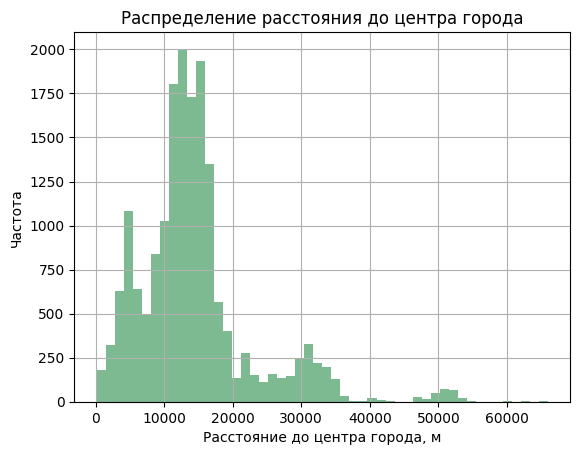

In [78]:
display(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins=50)

#прописываем оси и названия
plt.title('Распределение расстояния до центра города')
plt.ylabel('Частота') 
plt.xlabel('Расстояние до центра города, м');

Ограничим значения гистрограммы

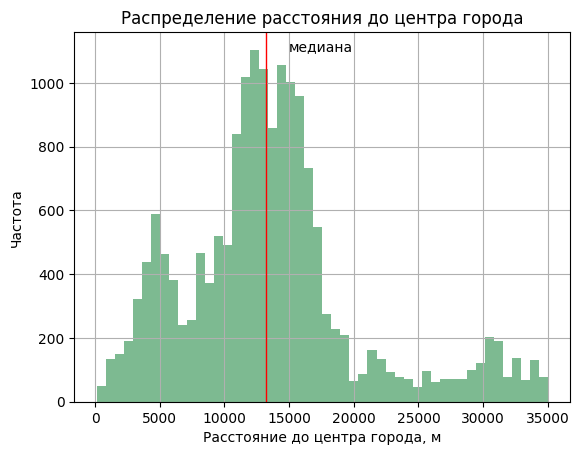

In [79]:
data['city_centers_nearest'].hist(bins=50,range=(150,35000))

plt.axvline(data['city_centers_nearest'].median(), color='r', linestyle='-', linewidth=1)
plt.text(15000,1100,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение расстояния до центра города')
plt.ylabel('Частота') 
plt.xlabel('Расстояние до центра города, м');

Есть несколько пиков в районе 5000 м и 13000 м (медиана). Возможно это зависит от типа и размеров поселений.\
Обратим внимание на аномалии.

In [80]:
data.query('city_centers_nearest > 45000')['locality_name'].value_counts()

locality_name
Ломоносов      123
Кронштадт       94
Петергоф        24
Зеленогорск     24
Молодежное       5
Репино           1
Name: count, dtype: int64

Все поселения выше — города или поселки в составе Санкт-Петербурга, поэтому геосервис посчитал расстояние не до центра населенного пункта, а до центра Санкт-Петербурга.

Удалим эти строки. 

In [81]:
data = data.query('city_centers_nearest < 45000 or city_centers_nearest.isna()')

**Наблюдение:** Чаще всего встречается расстояние до центра города около 13 км (рядом с медианным значением)
интересное распределение, думаю, следует глубже изучить причину возникновения второго пика на гистограмме.


#### Расстояние до ближайшего парка

count   7557.000
mean     496.812
std      344.009
min        1.000
25%      294.000
50%      458.000
75%      617.000
max     3190.000
Name: parks_nearest, dtype: float64

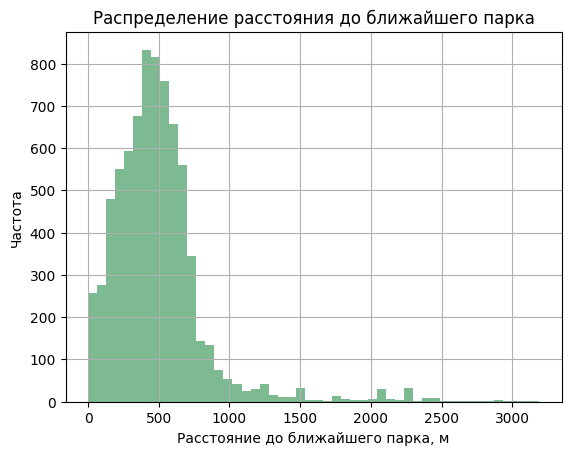

In [82]:
display(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=50)

#прописываем оси и названия
plt.title('Распределение расстояния до ближайшего парка')
plt.ylabel('Частота') 
plt.xlabel('Расстояние до ближайшего парка, м');

Ограничим значения гистограммы

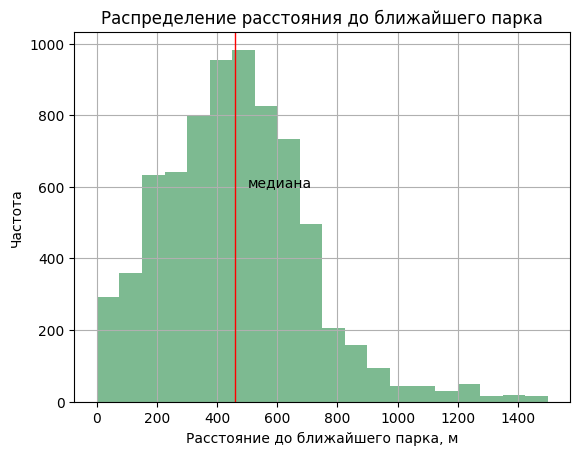

In [83]:
data['parks_nearest'].hist(bins=20,range=(0,1500))

plt.axvline(data['parks_nearest'].median(), color='r', linestyle='-', linewidth=1)
plt.text(500,600,'медиана',rotation=0)

#прописываем оси и названия
plt.title('Распределение расстояния до ближайшего парка')
plt.ylabel('Частота') 
plt.xlabel('Расстояние до ближайшего парка, м');

Пик гистограммы преходится на медиану.

Обратим внимание на аномалии.

In [84]:
data.sort_values(by='parks_nearest', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,city_centers_nearest_km,floor_category,total_area_rounded,living_area_rounded
10959,9,3.000,31.100,2017-03-21,1,NaN,5.000,17.700,2,False,False,False,5.500,0,Санкт-Петербург,14821.000,9734.000,0,3190.000,1,431.000,234.000,96463.023,1,3,2017,10.000,другой,31.000,18.000
19430,9,3.900,30.500,2018-02-22,1,2.600,5.000,16.500,1,False,False,False,5.500,0,Санкт-Петербург,14821.000,9734.000,0,3190.000,1,431.000,176.000,127868.852,3,2,2018,10.000,первый,30.000,16.000
1590,3,7.500,70.000,2017-07-11,2,NaN,18.000,37.000,13,False,False,False,10.000,0,Санкт-Петербург,14878.000,9791.000,0,3064.000,1,264.000,4.000,107142.859,1,7,2017,10.000,другой,70.000,37.000
19208,17,14.950,187.000,2017-10-12,5,3.000,2.000,80.000,2,False,False,False,17.000,1,Санкт-Петербург,36805.000,8656.000,0,3013.000,3,537.000,49.000,79946.523,3,10,2017,9.000,последний,187.000,80.000
23080,15,4.650,44.500,2018-02-20,2,NaN,5.000,25.200,2,False,False,False,5.500,1,Санкт-Петербург,14965.000,9877.000,1,2984.000,1,284.000,152.000,104494.383,1,2,2018,10.000,другой,44.000,25.000


Нам уже встречались 4 первые строки, когда мы заполняли пропуски.
Так как этот столбец логически подчинен соседнему `parks_around3000`, удалим все строки с удалённостью парков более 3000 м.

In [85]:
data = data.query('parks_nearest <= 3000 or parks_nearest.isna()')

**Наблюдение:** В среднем парки находятся на расстоянии 450 м., парк в пределах 1 км есть почти всегда.

#### Промежуточный вывод

Мы изучили и описали основные параметры, исправили аномалии, где это возможно, удалили выбивающиеся значения

**Наблюдения на этом этапе:**
* Больше всего распространены однокомнатные квартиры метражом 42 и 46 м².
* Стандартная высота потолка 2.5 метра, основные типы метража жилой площади — 17 и 18 м², также часто встречаются
30-метровые квартиры.
* Наиболее распространенный метраж кухонь 6,10 и 8 м². 
* В среднем парки находятся на расстоянии 450 м. и ближе, парк в пределах 1 км есть почти всегда.
* До центра города зачастую меньше 17 км, с самым частым расстоянием до центра — 13 км.
* Предложения есть как по всем этажам, но первый этаж встречается чуть реже последнего.
* Распространены пятиэтажки.

### Скорость продажи квартир

In [86]:
#округлим значения в столбце
data['days_exposition'] = round(data['days_exposition'],0)

count   19831.000
mean      178.112
std       216.577
min         1.000
25%        45.000
50%        94.000
75%       227.000
max      1580.000
Name: days_exposition, dtype: float64

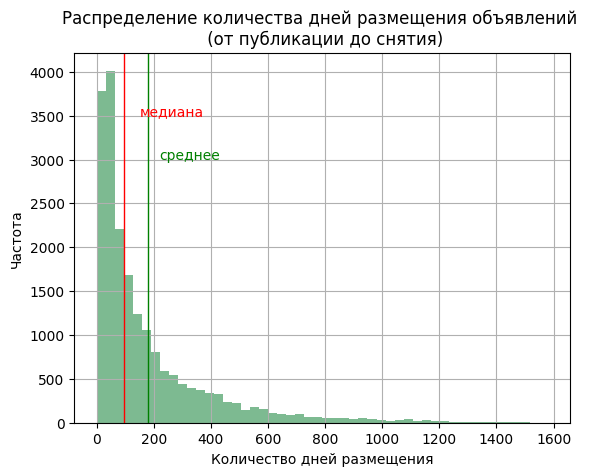

In [87]:
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins=50)

plt.axvline(data['days_exposition'].median(), color='r', linestyle='-', linewidth=1)
plt.axvline(data['days_exposition'].mean(), color='g', linestyle='-', linewidth=1)

plt.text(150,3500,'медиана',color='r',rotation=0)
plt.text(220,3000,'среднее',color='g',rotation=0)

#прописываем оси и названия
plt.title('Распределение количества дней размещения объявлений \n (от публикации до снятия)')
plt.xlabel('Количество дней размещения') 
plt.ylabel('Частота');

Приблизим пик гистограммы и сделаем его более дробным

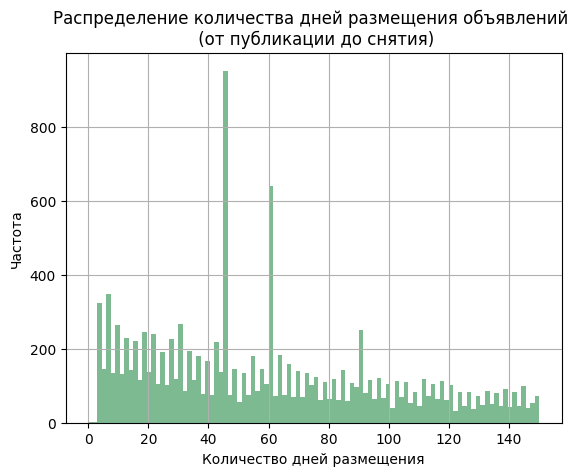

In [88]:
data['days_exposition'].hist(bins=100,range=(0,150))

#прописываем оси и названия
plt.title('Распределение количества дней размещения объявлений \n (от публикации до снятия)')
plt.xlabel('Количество дней размещения') 
plt.ylabel('Частота');

Несколько значений сильно выбиваются, давайте уточним какие именно.

In [89]:
#выводим топ 10 уникальных значений в столбце
data['days_exposition'].value_counts().head(10)

days_exposition
45.000    864
60.000    533
7.000     227
30.000    204
90.000    183
4.000     173
3.000     152
5.000     145
14.000    143
9.000     138
Name: count, dtype: int64

#### Промежуточный вывод

**В среднем объявления находятся в публикации 45 дней.**

Также можно заметить, что в топе уникальных значений кроме 45 дней, оказались другие "круглые" значения — 60 дней(2 месяца), 7 дней(неделя), 30 дней(месяц), 90 дней(3 месяца).
Есть гипотеза, что это связано с настройками сроков публикации, а не с тем, что квартира действительно была продана, а объявление снято. Возможно, чаще всего объявление просто устаревало и уходило в архив. Продана ли квартира мы не знаем.

Для определения необычно долгих публикаций вернемся к гистограмме. В значении 600 дней значения уже редки. В значении 1000 гистограмма сливается с нулем. 

Для определения быстрых продаж обратимся к медиане. Так как нам не нужно определять аномально быстрые продаже, будем считать что под быстрыми понимают все публикации короче 94 дней.

Нужно также вспомнить, что, возможно, из этого столбца датасета пропали значения в 1 и 2 дня. Это могло повлиять на статистику.

### Факторы, которые больше всего влияют на общую стоимость объекта.

Выделим нужные для изучения столбцы в отдельный список и построим диаграммы рассеяния для количественных переменных:

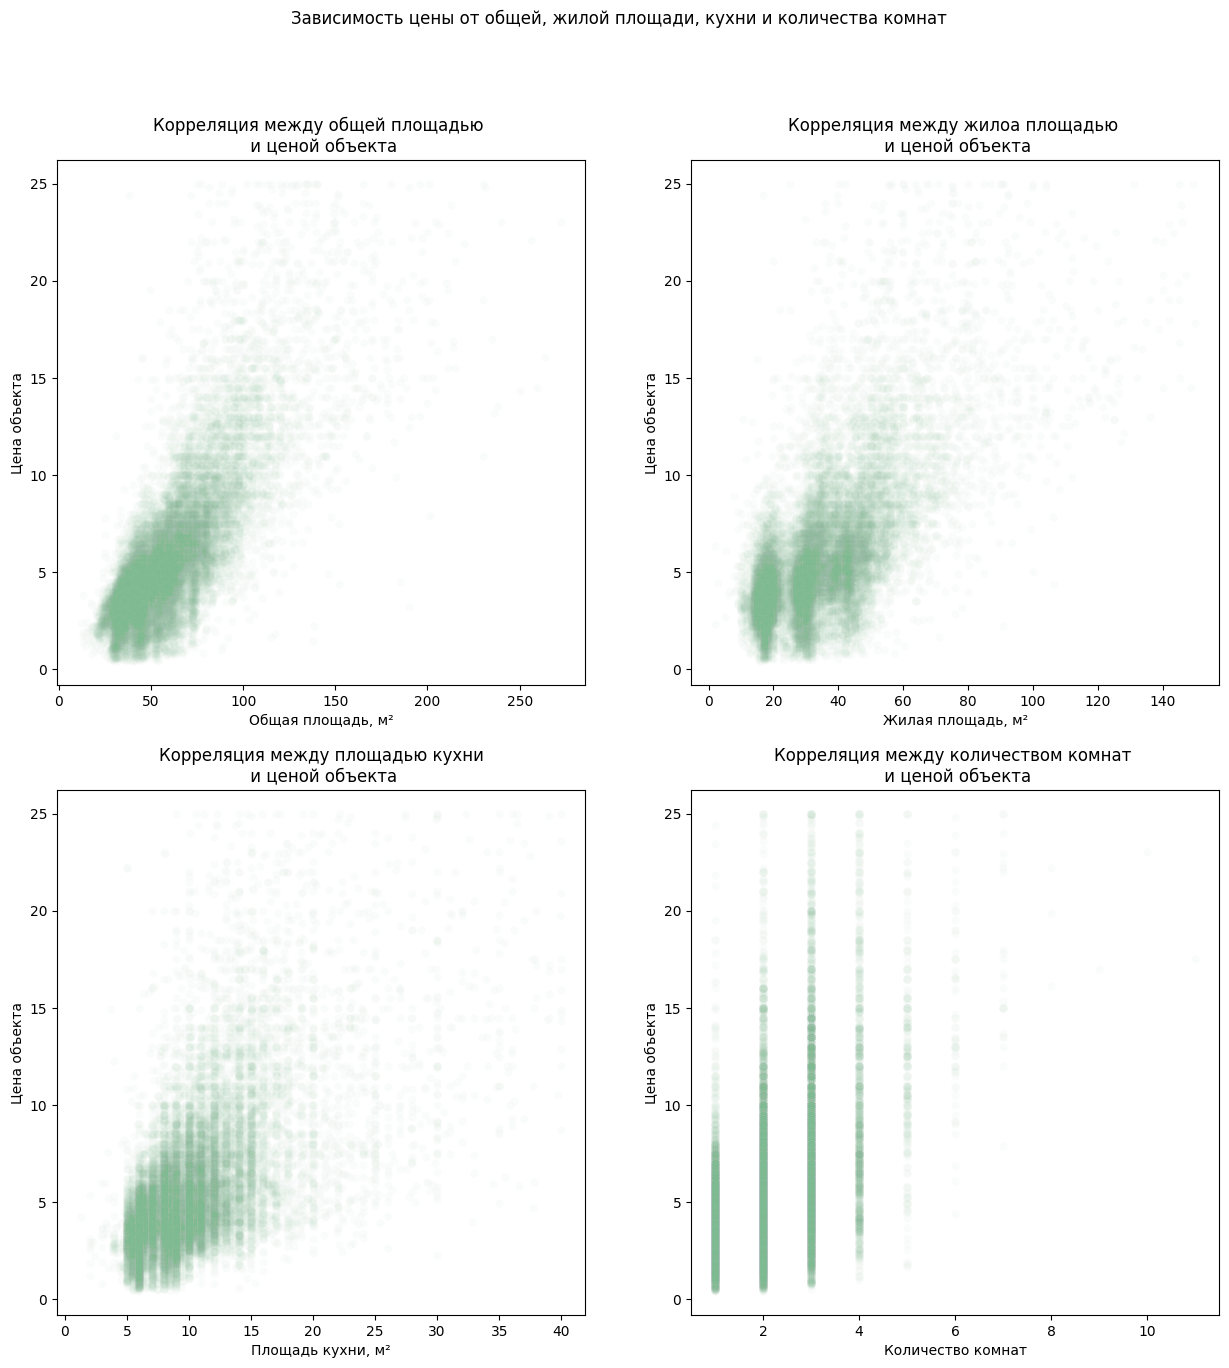

In [90]:
figure, axes = plt.subplots(2, 2, figsize=(15,15))
figure.suptitle('Зависимость цены от общей, жилой площади, кухни и количества комнат')

sns.scatterplot(ax=axes[0, 0], data=data, x='total_area', y='last_price',alpha=0.03)
axes[0, 0].set_title('Корреляция между общей площадью \n и ценой объекта')
axes[0, 0].set_xlabel('Общая площадь, м²')
axes[0, 0].set_ylabel('Цена объекта')

sns.scatterplot(ax=axes[0, 1], data=data, x='living_area', y='last_price',alpha=0.03)
axes[0, 1].set_title('Корреляция между жилоа площадью \n и ценой объекта')
axes[0, 1].set_xlabel('Жилая площадь, м²')
axes[0, 1].set_ylabel('Цена объекта')


sns.scatterplot(ax=axes[1, 0], data=data, x='kitchen_area', y='last_price',alpha=0.03)
axes[1, 0].set_title('Корреляция между площадью кухни\n и ценой объекта')
axes[1, 0].set_xlabel('Площадь кухни, м²')
axes[1, 0].set_ylabel('Цена объекта')

sns.scatterplot(ax=axes[1, 1],data=data, x='rooms', y='last_price',alpha=0.03)
axes[1, 1].set_title('Корреляция между количеством комнат \n и ценой объекта')
axes[1, 1].set_xlabel('Количество комнат')
axes[1, 1].set_ylabel('Цена объекта');

Для количественных параметров также посчитаем коэффициент корреляции Пирсона

In [91]:
#лист столбцов с количественными параметрами
correlation_list = ['total_area', 'living_area', 'kitchen_area', 'rooms']

for column in correlation_list:
    try:
        print('Коэффициент Пирсона общей стоимости к', str(column), '=', round(data['last_price'].corr(data[column]),2))
    except:
        pass

Коэффициент Пирсона общей стоимости к total_area = 0.78
Коэффициент Пирсона общей стоимости к living_area = 0.68
Коэффициент Пирсона общей стоимости к kitchen_area = 0.59
Коэффициент Пирсона общей стоимости к rooms = 0.51


Построим столбчатую диаграммы для категориальных параметров 

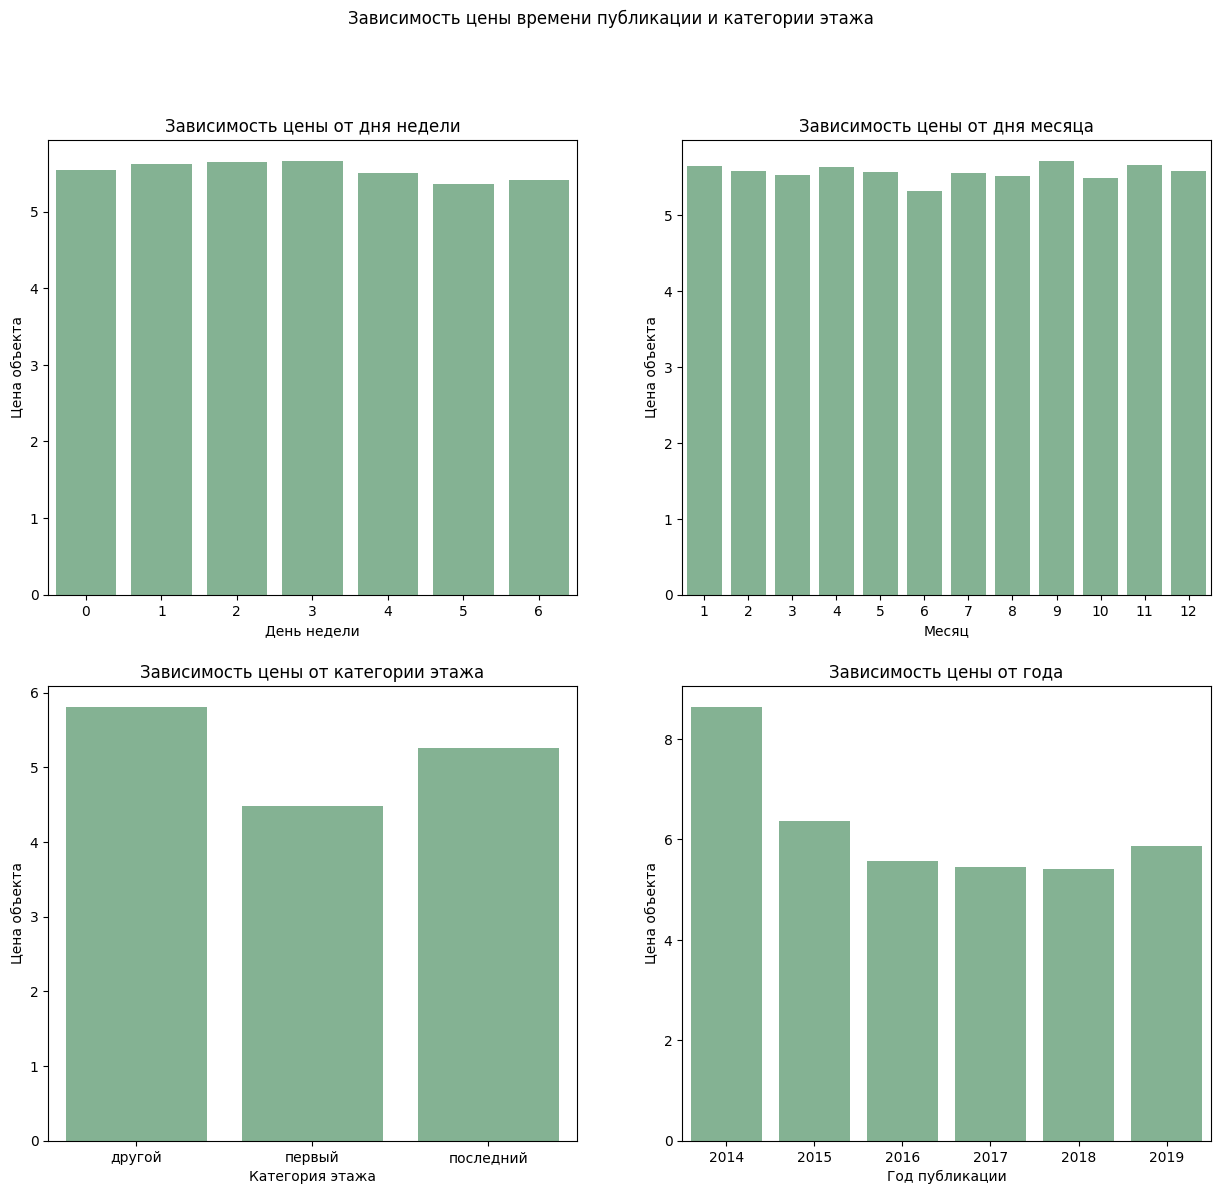

In [92]:
figure, axes = plt.subplots(2, 2, figsize=(15,13))
figure.suptitle('Зависимость цены времени публикации и категории этажа')

sns.barplot(ax=axes[0, 0], data=data, x='weekday', y='last_price',errorbar=None)
axes[0, 0].set_title('Зависимость цены от дня недели')
axes[0, 0].set_xlabel('День недели')
axes[0, 0].set_ylabel('Цена объекта')

sns.barplot(ax=axes[0, 1], data=data, x='month', y='last_price',errorbar=None)
axes[0, 1].set_title('Зависимость цены от дня месяца')
axes[0, 1].set_xlabel('Месяц')
axes[0, 1].set_ylabel('Цена объекта')

sns.barplot(ax=axes[1, 0], data=data, x='floor_category', y='last_price',errorbar=None)
axes[1, 0].set_title('Зависимость цены от категории этажа')
axes[1, 0].set_xlabel('Категория этажа')
axes[1, 0].set_ylabel('Цена объекта')

sns.barplot(ax=axes[1, 1],data=data, x='year', y='last_price',errorbar=None)
axes[1, 1].set_title('Зависимость цены от года')
axes[1, 1].set_xlabel('Год публикации')
axes[1, 1].set_ylabel('Цена объекта');

#### Промежуточный вывод

* **Зависимость цены от общей площади** — наблюдается выраженная положительная корреляция (0,78). Особенно это заметно для показателей до 100 кв. м. и до 10 000 000 рублей. Далее значения становятся менее согласованными.

* **Зависимость цены от жилой площади** — также есть положительная корреляция, но она не так ярко выражена (0,68).

* **Зависимость цены от площади кухни** — положительная корреляция всё ещё присутствует, но её значение меньше (0,59). Она прослеживается до показателей 13 кв.м. и стоимости 8 млн рублей, после чего значения становятся несогласованными.

* **Зависимость цены от количества комнат** — есть положительная корреляция (0,51). Можно отметить, что средняя стартовая цена для одно-, двух- и трёхкомнатных квартир почти не отличается, а вот верхний порог увеличивается вместе с количеством комнат в квартире.

* **Зависимость цены от этажа, на котором расположена квартира** — в среднем квартиры на первом этаже самые доступные по цене. Наиболее дорогие квартиры находятся вне первого и последнего этажей.

* **Зависимость стоимости от даты публикации объявления** — средняя цена не зависит от дня или месяца публикации. Самые высокие цены были зафиксированы в 2014 году, после чего они постепенно снижались до 2018 года, а затем немного выросли.

* **Цена квадратного метра в зависимости от местоположения** — стоимость квадратного метра самая низкая в Старополье и самая высокая в Санкт-Петербурге.

* **Влияние расстояния от центра на стоимость квартир в Санкт-Петербурге** — с увеличением расстояния от центра средняя стоимость снижается. Однако наблюдается подозрительный скачок цены в районе 27 км от центра.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Выведем на экран топ 10 населенных пунктов по количеству объявлений

In [93]:
#создаем срез данных с нужными столбцами и сохраняем его в новую переменную
data_slice =  data[['locality_name', 'square_meter_price']]

#делаем сводную таблицу и переназываем столбцы
data_pivot = data_slice.pivot_table(index='locality_name',aggfunc=[ 'count','mean'])
data_pivot.columns = ['Всего объявлений', 'Средняя стоимость']

#сортурем таблицу по количеству объявлений и выводим топ 10 на экран
data_pivot.sort_values(by='Всего объявлений', ascending=False).head(10)

,Всего объявлений,Средняя стоимость
locality_name,,
Санкт-Петербург,15128,109630.023
Мурино,589,86087.266
Кудрово,472,95324.930
Шушары,439,78703.266
Всеволожск,398,68654.469
Пушкин,359,102209.430
Колпино,337,75333.297
Парголово,327,90175.914
Гатчина,307,68746.148


Визуализируем эти данные на графике

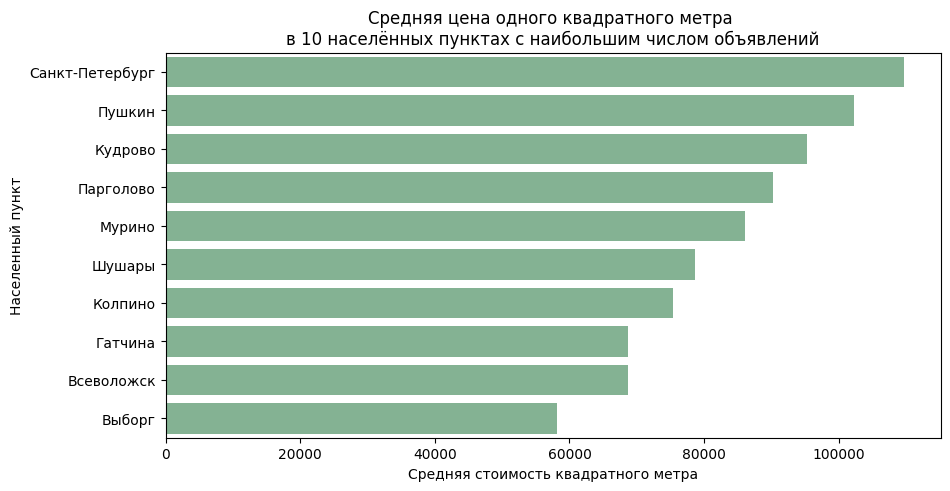

In [94]:
#создаем лист топ публикуемых локаций
top_locations_list = data_pivot.sort_values(by='Всего объявлений', ascending=False).head(10)
top_locations_list = top_locations_list.index.to_list()

#создаем нужный срез данных
top_locations_data_slice = data.query('locality_name in @top_locations_list')

#выводим график, отсортированный по убыванию
plt.figure(figsize=(10, 5))

order = top_locations_data_slice.groupby(['locality_name'])['square_meter_price'].mean().sort_values(ascending=False).index
sns.barplot(data=top_locations_data_slice, x='square_meter_price', y='locality_name', order=order, errorbar=None)

#прописываем оси и названия
plt.title('Средняя цена одного квадратного метра \nв 10 населённых пунктах с наибольшим числом объявлений')
plt.xlabel('Средняя стоимость квадратного метра') 
plt.ylabel('Населенный пункт');

In [95]:
#выводим топ 5 самых дорогих локаций
data_pivot.sort_values(by='Средняя стоимость', ascending=False).head(5)

,Всего объявлений,Средняя стоимость
locality_name,,
Кронштадт,1,111470.594
Санкт-Петербург,15128,109630.023
Пушкин,359,102209.430
Сестрорецк,182,101912.344
Лисий Нос,3,100660.812


In [96]:
#выводим топ 5 самых дешевых локаций
data_pivot.sort_values(by='Средняя стоимость', ascending=True).head()

,Всего объявлений,Средняя стоимость
locality_name,,
Старополье,3,11206.220
Свирь,2,11481.480
Вахнова Кара,1,11688.310
Выскатка,2,12335.484
Совхозный,2,12629.130


#### Промежуточный вывод

Дешевле всего недвижимость в Старополье, а дороже всего — Санкт-Петербурге (формально лидер — Кронштадт, но так как в расчете участвовала всего одна строка, и выше мы отсекли аномально дорогие квартиры, находящиеся в Петербурге, то ее можно проигнорировать.**

### Зависимость между ценой на квартиры в Санкт-Петербурге и удаленностью от центра

Для расчетов нам понадобятся два стобца `last_price` и `city_centers_nearest_km`.

In [97]:
#создаем срез данных с нужными столбцами и сохраняем его в новую переменную
data_slice_peterburg =  data.query('locality_name == "Санкт-Петербург"')[['last_price','city_centers_nearest_km']]
#создаем сводную таблицу и сортируем значения по километрам от центра
data_pivot_peterburg = data_slice_peterburg.pivot_table(index='city_centers_nearest_km')
#поменяем название столбцу
data_pivot_peterburg.columns = ['Средняя стоимость']

data_pivot_peterburg.head()

,Средняя стоимость
city_centers_nearest_km,
0.000,10.199
1.000,10.990
2.000,10.606
3.000,9.410
4.000,9.842


Построим также график изменения средней цены для каждого километра от центра Петербурга.

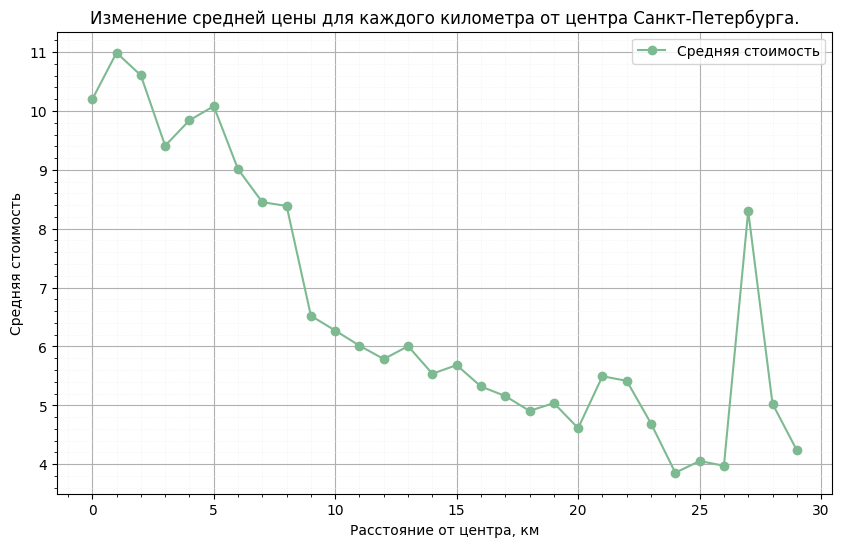

In [98]:
ax = data_pivot_peterburg.plot(style='o-', grid=True, figsize=(10, 6))
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

ax.minorticks_on()

#прописываем оси и названия
plt.title('Изменение средней цены для каждого километра от центра Санкт-Петербурга.')
plt.xlabel('Расстояние от центра, км') 
plt.ylabel('Средняя стоимость');

In [99]:
print('Коэффициент Пирсона отношения общей стоимости к расстоянию до центра города равняется ',
      round(data_slice_peterburg['last_price'].corr(data['city_centers_nearest_km']),2))


Коэффициент Пирсона отношения общей стоимости к расстоянию до центра города равняется  -0.42


#### Промежуточный вывод

С удалением от центра средняя стоимость падает, но есть подозрительный скачок цены в районе 27 км.
Может быть, там находится какой-то элитный поселок?

После 8-9 можно заметить резкий спад стоимости. Возможно там как раз заканчивается центральный район города?
    
Также из-за округления значений появился "нулевой" километр, это означает, что до центра города менее 500 м.
Интересно, что в его пределах цена чуть меньше, чем при расстоянии 1 км (500 м-1500 м).
Думаю, стоит уточнить что геосервис принимает за точку центра Санкт-Петербурга,
чтобы лучше понять это явление.

## Итоги исследования

**`В рамках предобработки данных:`**

* привели названия столбцов к единому формату,
* выявили пропуски в столбцах и заполнили там, где возможно. Оставили пропуски там, где логичную замену найти невозможно. Обратили внимания на те столбцы, где пропуски уместны,
* проверили и поменяли, где это уместно, типы данных,
* удалили скрытые дубликаты (явных дубликатов не обнаружено)
* создали несколько столбцов с новыми параметрами

**`В рамках исследования:`**

Изучили и описали основные параметры, исправили аномалии, где это возможно, удалили выбивающиеся значения

**Основные наблюдения:**
* Однокомнатные квартиры площадью 42 и 46 квадратных метров встречаются чаще всего.
* Стандартная высота потолка составляет 2,5 метра.
* Жилая площадь квартир обычно составляет 17 или 18 квадратных метров, но также часто встречаются квартиры площадью 30 квадратных метров.
* Площадь кухонь в среднем составляет 6, 8 или 10 квадратных метров.
* Парки обычно находятся на расстоянии не более 450 метров от домов. Почти всегда есть парк в пределах одного километра.
* Расстояние до центра города обычно меньше 17 километров, а наиболее распространённое расстояние — 13 километров.
* Предложения о продаже есть на всех этажах, но первый этаж встречается чуть реже последнего.
* Распространены пятиэтажки.

**Цена недвижимости** — Наиболее распространённая стоимость недвижимости — около 3,5 млн. Большинство объявлений находятся в ценовом диапазоне от 0,43 до 10 млн рублей, а медианное значение составляет 4,6 млн рублей.

В исследовании мы выяснили среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 


**Скорость продажи квартир:**

Средний срок размещения объявления о продаже квартиры на площадке — 45 дней. Быстрыми можно считать продажи со сроком меньше медианного значения — 94 дней, что говорит о том, что в целом продажи происходят быстро. Аномально долгими публикациями можно считать предложения со сроком более 20 месяцев.

**`Рыночная стоимость объектов недвижимости зависит от множества факторов, мы выяснили, что больше всего на цену влияют следующие параметры:`**

* общая площадь;
* жилая площадь; 
* количество комнат;
* этаж, на котором расположена квартира;
* местоположение;
* расстояние от центра.

**`Рекомендации автоматизации`**

* Необходимо проанализировать алгоритм получения данных в столбце «days_exposition». Стоит выяснить, почему пропадают значения 1 и 2 дня. Также следует обратить внимание на частоту размещения объявлений на неделю, 30, 45, 60 и 90 дней — возможно, это связано с настройками публикаций.

* В анкете необходимо сделать обязательными к заполнению поля, которые заполняются вручную (например, в поле «is_apartment» можно автоматически выбирать из двух значений: «Да» или «Нет»). Также стоит автоматически заполнять поле с названием локации и добавить автоматическую проверку формата данных, вводимых пользователем.

* Следует уточнить информацию о районе, который находится на расстоянии 27 км от центра города, чтобы понять причину высокой средней стоимости жилья в этом районе.